# Connecting to drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Reading data

In [2]:
import pandas as pd
# Read Excel files
finance_data = pd.read_excel("/content/gdrive/MyDrive/Thesis 4.1/finance.xlsx")

# adjusted_price= pd.read_excel("/content/gdrive/MyDrive/Thesis 4.1/adjusted_price.xlsx")
unadjusted_price_1= pd.read_excel("/content/gdrive/MyDrive/Thesis 4.1/unadjusted_price_1.xlsx")
unadjusted_price_2= pd.read_excel("/content/gdrive/MyDrive/Thesis 4.1/unadjusted_price_2.xlsx")

# adjusted_data_old= pd.read_excel("/content/gdrive/MyDrive/Thesis 4.1/adjusted_price_old.xlsx")
unadjusted_price_1_old= pd.read_excel("/content/gdrive/MyDrive/Thesis 4.1/unadjusted_price_1_old.xlsx")
unadjusted_price_2_old= pd.read_excel("/content/gdrive/MyDrive/Thesis 4.1/unadjusted_price_2_old.xlsx")

In [3]:
finance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7725 entries, 0 to 7724
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Symbol     7725 non-null   object 
 1   Sector     7725 non-null   object 
 2   Year       7725 non-null   int64  
 3   Eps        7457 non-null   float64
 4   PE         5597 non-null   float64
 5   Asst/Shr   7246 non-null   float64
 6   Profit     7016 non-null   float64
 7   Divid%     4484 non-null   float64
 8   Div.Yield  4412 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 543.3+ KB


# Preprocessing

## Combining price data

In [4]:
import pandas as pd
price_data = pd.concat([unadjusted_price_1,unadjusted_price_2,unadjusted_price_1_old,unadjusted_price_2_old], ignore_index=True)
print(price_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1977284 entries, 0 to 1977283
Data columns (total 7 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Symbol  object 
 1   Date    object 
 2   Open    float64
 3   High    float64
 4   Low     float64
 5   Close   float64
 6   Volume  float64
dtypes: float64(5), object(2)
memory usage: 105.6+ MB
None


## Removing duplicate rows from price data

In [5]:
price_data = price_data.drop_duplicates()
print(price_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1977004 entries, 0 to 1977283
Data columns (total 7 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Symbol  object 
 1   Date    object 
 2   Open    float64
 3   High    float64
 4   Low     float64
 5   Close   float64
 6   Volume  float64
dtypes: float64(5), object(2)
memory usage: 120.7+ MB
None


## Transforming daily price data to yearly price data

In [6]:
import pandas as pd

# Convert 'Date' column to datetime format
price_data['Date'] = pd.to_datetime(price_data['Date'])

# Sort price_data by 'Date' and 'Symbol'
price_data.sort_values(by=['Symbol', 'Date'], inplace=True)

# Extract year from the 'Date' column
price_data['Year'] = price_data['Date'].dt.year

# Group by 'Symbol' and 'Year', aggregate the data
yearly_price_data = price_data.groupby(['Symbol', 'Year']).agg({
    'Open': 'first',  # First open price of the year
    'Close': 'last',  # Last close price of the year
    'Volume': 'sum'   # Total volume for the year
}).reset_index()

# Calculate return
yearly_price_data['Return'] = ((yearly_price_data['Close'] - yearly_price_data['Open']) / yearly_price_data['Open'])

# Rename columns
yearly_price_data.rename(columns={'Open': 'Open_Price', 'Close': 'Close_Price'}, inplace=True)

# Reorder columns
yearly_price_data = yearly_price_data[['Symbol', 'Year', 'Open_Price', 'Close_Price', 'Return', 'Volume']]

# Print the resulting DataFrame
print(yearly_price_data)
print(yearly_price_data.info())

          Symbol  Year  Open_Price  Close_Price    Return       Volume
0      1JANATAMF  2010        10.6         13.0  0.226415  127410500.0
1      1JANATAMF  2011        10.7          8.9 -0.168224  184654000.0
2      1JANATAMF  2012         9.0          7.0 -0.222222  123479500.0
3      1JANATAMF  2013         7.1          6.0 -0.154930  172294000.0
4      1JANATAMF  2014         6.0          5.1 -0.150000  130095110.0
...          ...   ...         ...          ...       ...          ...
6827  ZEALBANGLA  2020        31.4        145.8  3.643312    4586043.0
6828  ZEALBANGLA  2021       150.0        116.1 -0.226000    1943312.0
6829  ZEALBANGLA  2022       120.3        172.5  0.433915    1910270.0
6830  ZEALBANGLA  2023       170.8        140.4 -0.177986    2633597.0
6831  ZEALBANGLA  2024       135.1        131.9 -0.023686     258282.0

[6832 rows x 6 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6832 entries, 0 to 6831
Data columns (total 6 columns):
 #   Column      

## Handling null rows of finance data

In [7]:
# Drop rows where all values except "Symbol", "Sector", "Year", "Div.Yield" are null
columns_to_keep = ['Symbol', 'Sector', 'Year']
columns_to_drop = finance_data.columns.difference(columns_to_keep)
finance_data.dropna(subset=columns_to_drop, how='all', inplace=True)

In [8]:
finance_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7700 entries, 0 to 7724
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Symbol     7700 non-null   object 
 1   Sector     7700 non-null   object 
 2   Year       7700 non-null   int64  
 3   Eps        7457 non-null   float64
 4   PE         5597 non-null   float64
 5   Asst/Shr   7246 non-null   float64
 6   Profit     7016 non-null   float64
 7   Divid%     4484 non-null   float64
 8   Div.Yield  4412 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 601.6+ KB


## Merging finance and yearly price dataframes

In [9]:
# Merge the dataframes on Symbol and Year
merged_data = pd.merge(finance_data, yearly_price_data, on=["Symbol", "Year"])

In [10]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5067 entries, 0 to 5066
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Symbol       5067 non-null   object 
 1   Sector       5067 non-null   object 
 2   Year         5067 non-null   int64  
 3   Eps          4893 non-null   float64
 4   PE           3992 non-null   float64
 5   Asst/Shr     4743 non-null   float64
 6   Profit       4598 non-null   float64
 7   Divid%       3284 non-null   float64
 8   Div.Yield    3293 non-null   float64
 9   Open_Price   5067 non-null   float64
 10  Close_Price  5067 non-null   float64
 11  Return       5067 non-null   float64
 12  Volume       5067 non-null   float64
dtypes: float64(10), int64(1), object(2)
memory usage: 514.7+ KB


In [11]:
print(merged_data.columns)

Index(['Symbol', 'Sector', 'Year', 'Eps', 'PE', 'Asst/Shr', 'Profit', 'Divid%',
       'Div.Yield', 'Open_Price', 'Close_Price', 'Return', 'Volume'],
      dtype='object')


## Handling null cells

In [12]:
#replace null values of certain columns with 0
columns_to_replace = ["Eps", "PE", "Divid%", "Div.Yield", "Profit"]
merged_data[columns_to_replace] = merged_data[columns_to_replace].fillna(0)

In [13]:
#replace null values of a certain column with its mean
merged_data['Asst/Shr'] = merged_data.groupby('Symbol')['Asst/Shr'].transform(lambda x: x.fillna(x.mean()))

In [14]:
#replace null values of certain columns with 0
columns_to_replace = ['Asst/Shr']
merged_data[columns_to_replace] = merged_data[columns_to_replace].fillna(0)

## Selecting columns

In [15]:
# Select relevant columns for the final dataset
final_data = merged_data[["Symbol", "Sector", "Year", "Eps", "PE", "Asst/Shr", "Profit", "Divid%", "Div.Yield", "Volume", "Open_Price", "Close_Price", "Return"]]

# Rename the columns for clarity
final_data.columns = ["Symbol", "Sector", "Year", "Eps", "PE", "Asst/Shr", "Profit", "Divid%", "Div.Yield", "Volume", "Open_Price", "Close_Price", "Return"]

# Display the final dataset
print(final_data.head())

      Symbol       Sector  Year   Eps     PE  Asst/Shr  Profit  Divid%  \
0  1JANATAMF  MutualFunds  2023 -0.32   0.00      9.78  -92.55     0.0   
1  1JANATAMF  MutualFunds  2022  0.24  26.47     10.80   70.10     7.0   
2  1JANATAMF  MutualFunds  2021  2.54   2.76     11.94  735.56    13.0   
3  1JANATAMF  MutualFunds  2020 -1.26  -3.25      9.32 -365.78     0.0   
4  1JANATAMF  MutualFunds  2019  0.28  16.99     10.88   81.92     3.0   

   Div.Yield       Volume  Open_Price  Close_Price    Return  
0       0.00    1694211.0         6.1          6.1  0.000000  
1      10.94   77133290.0         6.3          6.1 -0.031746  
2      18.57  422834271.0         6.1          6.2  0.016393  
3       0.00  624182608.0         4.2          6.0  0.428571  
4       6.25  205832239.0         4.5          4.3 -0.044444  


In [16]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5067 entries, 0 to 5066
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Symbol       5067 non-null   object 
 1   Sector       5067 non-null   object 
 2   Year         5067 non-null   int64  
 3   Eps          5067 non-null   float64
 4   PE           5067 non-null   float64
 5   Asst/Shr     5067 non-null   float64
 6   Profit       5067 non-null   float64
 7   Divid%       5067 non-null   float64
 8   Div.Yield    5067 non-null   float64
 9   Volume       5067 non-null   float64
 10  Open_Price   5067 non-null   float64
 11  Close_Price  5067 non-null   float64
 12  Return       5067 non-null   float64
dtypes: float64(10), int64(1), object(2)
memory usage: 514.7+ KB


## Correlation

                 Year       Eps        PE  Asst/Shr    Profit    Divid%  \
Year         1.000000 -0.079524  0.083554 -0.023733  0.068556  0.012813   
Eps         -0.079524  1.000000 -0.016692  0.510271  0.264531  0.072669   
PE           0.083554 -0.016692  1.000000  0.087436 -0.026882 -0.005180   
Asst/Shr    -0.023733  0.510271  0.087436  1.000000  0.069578  0.030433   
Profit       0.068556  0.264531 -0.026882  0.069578  1.000000  0.018975   
Divid%       0.012813  0.072669 -0.005180  0.030433  0.018975  1.000000   
Div.Yield   -0.086734  0.122568 -0.072846  0.045015  0.094507  0.008581   
Volume       0.245584 -0.064801 -0.020606 -0.054934  0.086103 -0.009792   
Open_Price  -0.246381  0.372204  0.004195  0.248920  0.062313  0.030012   
Close_Price -0.257636  0.380486  0.005096  0.227448  0.052517  0.032687   
Return      -0.051845  0.004400  0.020325 -0.017968 -0.021568 -0.002311   

             Div.Yield    Volume  Open_Price  Close_Price    Return  
Year         -0.086734  0.245

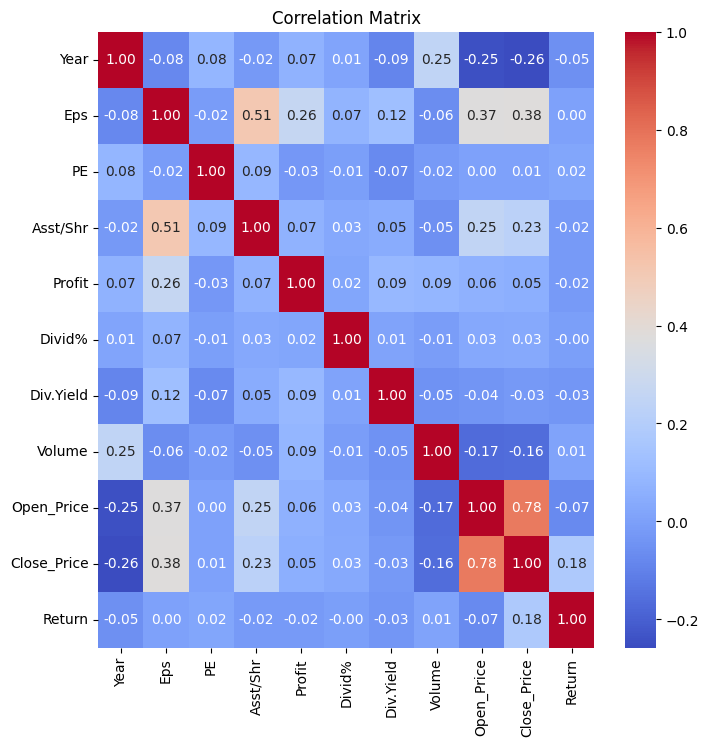

In [17]:
import pandas as pd

# Drop non-numeric columns
numeric_data = final_data.select_dtypes(include=[float, int])

# Fill missing values
numeric_data.fillna(0, inplace=True)

# Or drop rows with missing values
numeric_data.dropna(inplace=True)

correlation_matrix = numeric_data.corr()
print(correlation_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [18]:
# import pandas as pd

# correlation_matrix = final_data.corr()
# print(correlation_matrix)

# import seaborn as sns
# import matplotlib.pyplot as plt

# # Plot the correlation matrix as a heatmap
# plt.figure(figsize=(8, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Matrix')
# plt.show()

## Label

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Sort the data by Symbol and Year to ensure chronological order
final_data.sort_values(by=["Symbol", "Year"], inplace=True)

# Shift the Stock Return column to get the next year's return as the target variable
final_data["Next Year's Return"] = final_data.groupby("Symbol")["Return"].shift(-1)

# Drop rows where Next Year's Stock Return is NaN (since we can't predict those)
final_data.dropna(subset=["Next Year's Return"], inplace=True)

# Count the number of unique symbols
unique_symbols = final_data['Symbol'].nunique()
print("Number of unique symbols:", unique_symbols)

# Count the number of unique sectors
unique_sectors = final_data['Sector'].nunique()
print("Number of unique sectors:", unique_sectors)

final_data=final_data.drop(columns=["Symbol"])
print(final_data.info())

Number of unique symbols: 376
Number of unique sectors: 18
<class 'pandas.core.frame.DataFrame'>
Index: 4687 entries, 12 to 5046
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sector              4687 non-null   object 
 1   Year                4687 non-null   int64  
 2   Eps                 4687 non-null   float64
 3   PE                  4687 non-null   float64
 4   Asst/Shr            4687 non-null   float64
 5   Profit              4687 non-null   float64
 6   Divid%              4687 non-null   float64
 7   Div.Yield           4687 non-null   float64
 8   Volume              4687 non-null   float64
 9   Open_Price          4687 non-null   float64
 10  Close_Price         4687 non-null   float64
 11  Return              4687 non-null   float64
 12  Next Year's Return  4687 non-null   float64
dtypes: float64(11), int64(1), object(1)
memory usage: 512.6+ KB
None


## Encoding categorical data

In [20]:
# encoding categorical data
final_data = pd.get_dummies(final_data, columns=['Sector'])
print(final_data.info())

# Write the final dataset to a new Excel file
final_data.to_excel("merged_data.xlsx", index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 4687 entries, 12 to 5046
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              4687 non-null   int64  
 1   Eps                               4687 non-null   float64
 2   PE                                4687 non-null   float64
 3   Asst/Shr                          4687 non-null   float64
 4   Profit                            4687 non-null   float64
 5   Divid%                            4687 non-null   float64
 6   Div.Yield                         4687 non-null   float64
 7   Volume                            4687 non-null   float64
 8   Open_Price                        4687 non-null   float64
 9   Close_Price                       4687 non-null   float64
 10  Return                            4687 non-null   float64
 11  Next Year's Return                4687 non-null   float64
 12  Sector_Ban

## Correlation

                                      Year       Eps        PE  Asst/Shr  \
Year                              1.000000 -0.076287  0.076236 -0.022042   
Eps                              -0.076287  1.000000 -0.016024  0.502447   
PE                                0.076236 -0.016024  1.000000  0.038449   
Asst/Shr                         -0.022042  0.502447  0.038449  1.000000   
Profit                            0.075255  0.245330 -0.026981  0.065241   
Divid%                            0.015863  0.067184 -0.005114  0.025915   
Div.Yield                        -0.081441  0.109359 -0.069440  0.033941   
Volume                            0.289730 -0.065387 -0.016314 -0.054010   
Open_Price                       -0.247137  0.367025  0.003506  0.253773   
Close_Price                      -0.259076  0.377846  0.001834  0.228405   
Return                           -0.056215  0.004315  0.020115 -0.016927   
Next Year's Return               -0.075601 -0.048260 -0.000065 -0.035142   
Sector_Bank 

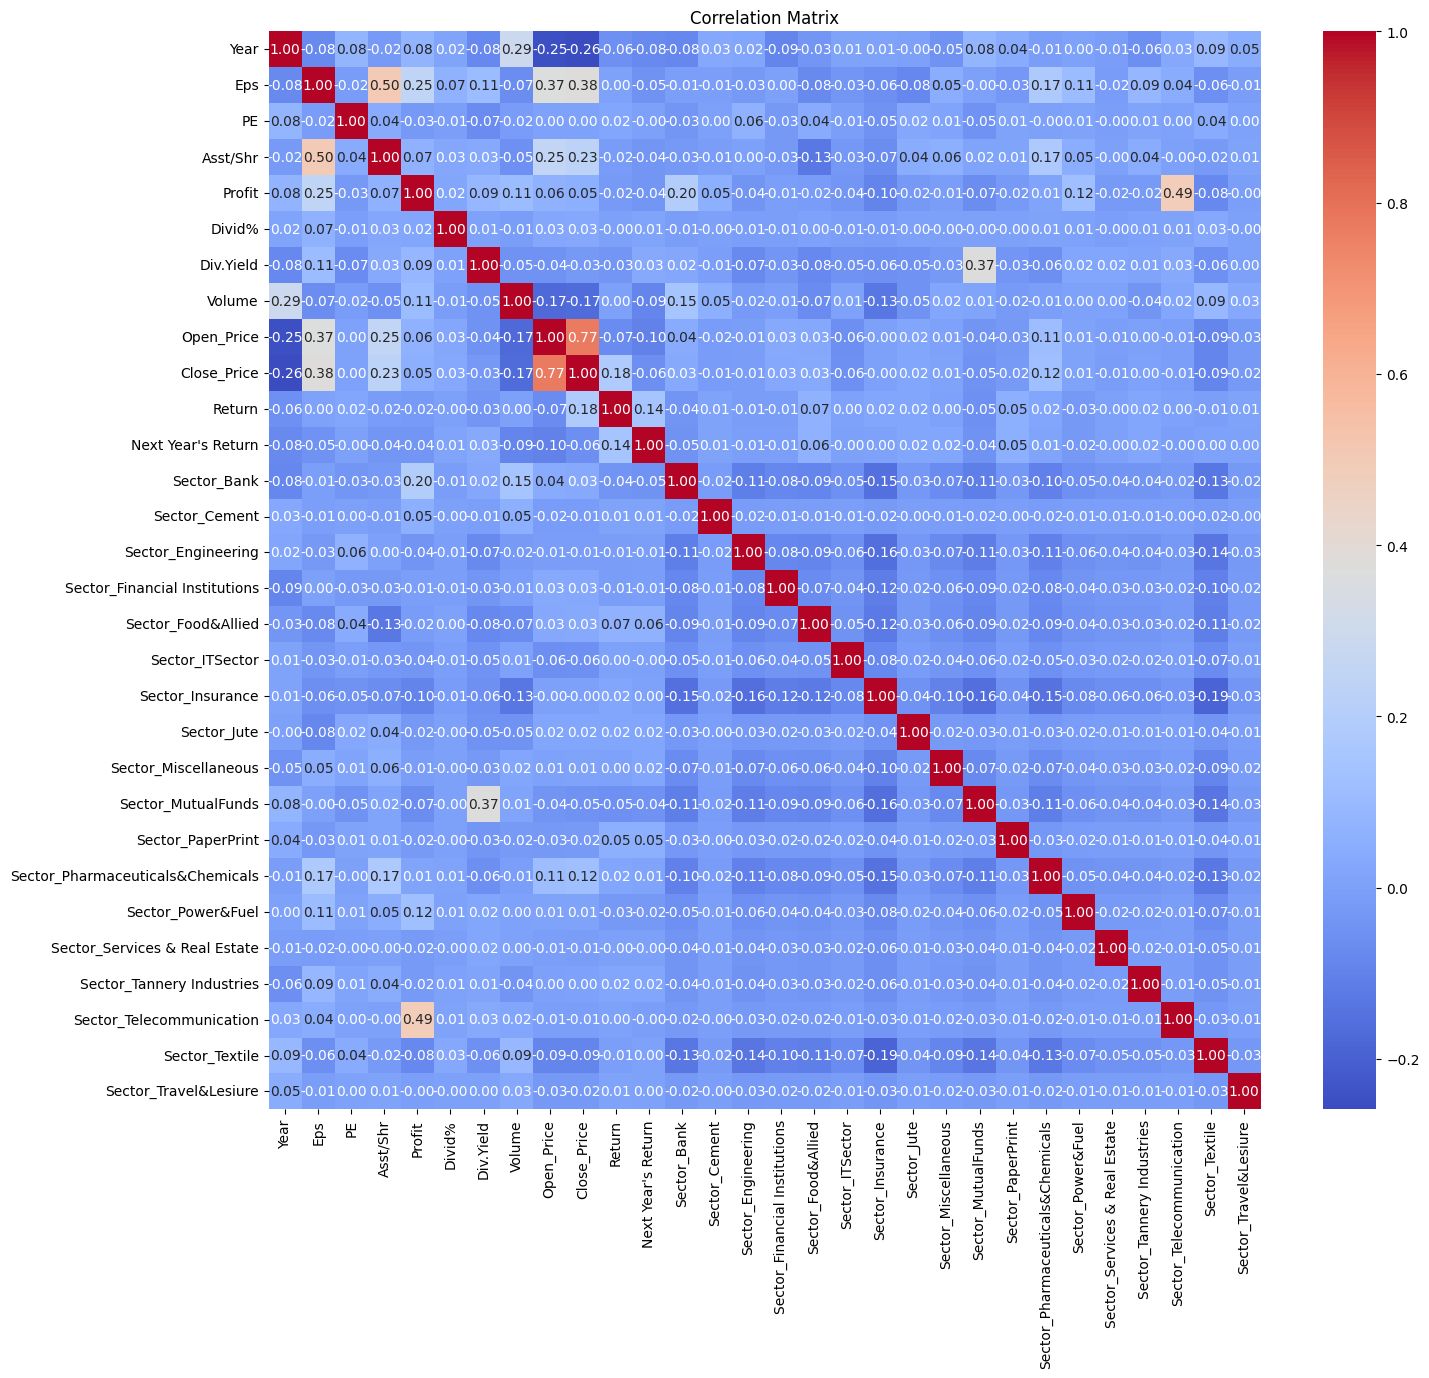

In [21]:
import pandas as pd

correlation_matrix = final_data.corr()
print(correlation_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Train test split

### Train test split if done randomly (commented out)

In [22]:
# # Select features (X) and target variable (y)
# X = final_data.drop(columns=["Next Year's Total Stock Return"])  # Features excluding the target variable and the current year's return
# y = final_data["Next Year's Total Stock Return"]  # Target variable

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Train test split if latest data in test set

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Sort the data by the "Year" column in descending order ("Year" is the column indicating time)
final_data_sorted = final_data.sort_values(by="Year", ascending=False)

# Calculate the index where 20% of the data lies
test_index = int(0.2 * len(final_data_sorted))

# Split the data into training and testing sets
X_train = final_data_sorted.iloc[test_index:]  # Use data from the test_index onwards for training
X_test = final_data_sorted.iloc[:test_index]  # Use data up to the test_index for testing

# Separate the target variable
y_train = X_train["Next Year's Return"]
y_test = X_test["Next Year's Return"]

# Drop the target variable from the feature sets
X_train = X_train.drop(columns=["Next Year's Return"])
X_test = X_test.drop(columns=["Next Year's Return"])

### Mean and stddev of prediction

In [24]:
final_data_sorted["Next Year's Return"].mean()
print("dataset Return mean: ", final_data_sorted["Next Year's Return"].mean())
print("dataset Return median: ", final_data_sorted["Next Year's Return"].median())
print("dataset Return std dev: ", final_data_sorted["Next Year's Return"].std())

print("y_train mean: ", y_train.mean())
print("y_train median: ", y_train.median())
print("y_train std dev: ", y_train.std())

print("y_test mean: ", y_test.mean())
print("y_test median: ", y_test.median())
print("y_test std dev: ", y_test.std())

dataset Return mean:  0.09629476737752354
dataset Return median:  -0.020202020202020308
dataset Return std dev:  0.6821221604731662
y_train mean:  0.08508290576413974
y_train median:  -0.04340579710144934
y_train std dev:  0.7140112744104565
y_test mean:  0.1411661452325815
y_test median:  0.0
y_test std dev:  0.533802271776651


In [25]:
print(X_train.shape)
print(X_test.shape)

(3750, 29)
(937, 29)


In [26]:
# X.info()
final_data_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4687 entries, 5046 to 1437
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              4687 non-null   int64  
 1   Eps                               4687 non-null   float64
 2   PE                                4687 non-null   float64
 3   Asst/Shr                          4687 non-null   float64
 4   Profit                            4687 non-null   float64
 5   Divid%                            4687 non-null   float64
 6   Div.Yield                         4687 non-null   float64
 7   Volume                            4687 non-null   float64
 8   Open_Price                        4687 non-null   float64
 9   Close_Price                       4687 non-null   float64
 10  Return                            4687 non-null   float64
 11  Next Year's Return                4687 non-null   float64
 12  Sector_B

## Standardization

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train.iloc[:, 1:11] = scaler.fit_transform(X_train.iloc[:, 1:11])
X_test.iloc[:, 1:11] = scaler.transform(X_test.iloc[:, 1:11])

print(X_train)
print(X_test)
print(y_train)
print(y_test)

      Year       Eps        PE  Asst/Shr    Profit    Divid%  Div.Yield  \
1593  2019 -0.331182 -0.117976 -0.254861 -0.234996 -0.267706   0.429537   
1782  2019 -0.330333 -0.132113 -0.253242 -0.111944 -0.267706   1.044476   
1262  2019 -0.466140 -0.304387 -0.336265 -0.493753 -0.310740  -0.706356   
4435  2019 -0.212352 -0.207587 -0.173456  0.766047 -0.239016   0.265732   
4397  2019 -0.098614 -0.036990  0.084468 -0.014225 -0.239016  -0.470047   
...    ...       ...       ...       ...       ...       ...        ...   
2029  2000  0.476866 -0.215015  0.748274 -0.257243  0.263055   0.759832   
2090  2000  0.161965 -0.222203 -0.029498 -0.257305  0.191331   1.530520   
816   2000  0.144989 -0.194769  0.031151  0.045019  0.980299   2.618076   
437   2000  0.716225 -0.261498 -0.109380 -0.282535 -0.310740   1.079385   
1437  2000  0.175546 -0.255628 -0.213349 -0.163511  0.047882   0.912895   

        Volume  Open_Price  Close_Price  ...  Sector_Miscellaneous  \
1593 -0.316971   -0.417575   

## Correlation

                                      Year       Eps        PE  Asst/Shr  \
Year                              1.000000 -0.076287  0.076236 -0.022042   
Eps                              -0.076287  1.000000 -0.016024  0.502447   
PE                                0.076236 -0.016024  1.000000  0.038449   
Asst/Shr                         -0.022042  0.502447  0.038449  1.000000   
Profit                            0.075255  0.245330 -0.026981  0.065241   
Divid%                            0.015863  0.067184 -0.005114  0.025915   
Div.Yield                        -0.081441  0.109359 -0.069440  0.033941   
Volume                            0.289730 -0.065387 -0.016314 -0.054010   
Open_Price                       -0.247137  0.367025  0.003506  0.253773   
Close_Price                      -0.259076  0.377846  0.001834  0.228405   
Return                           -0.056215  0.004315  0.020115 -0.016927   
Next Year's Return               -0.075601 -0.048260 -0.000065 -0.035142   
Sector_Bank 

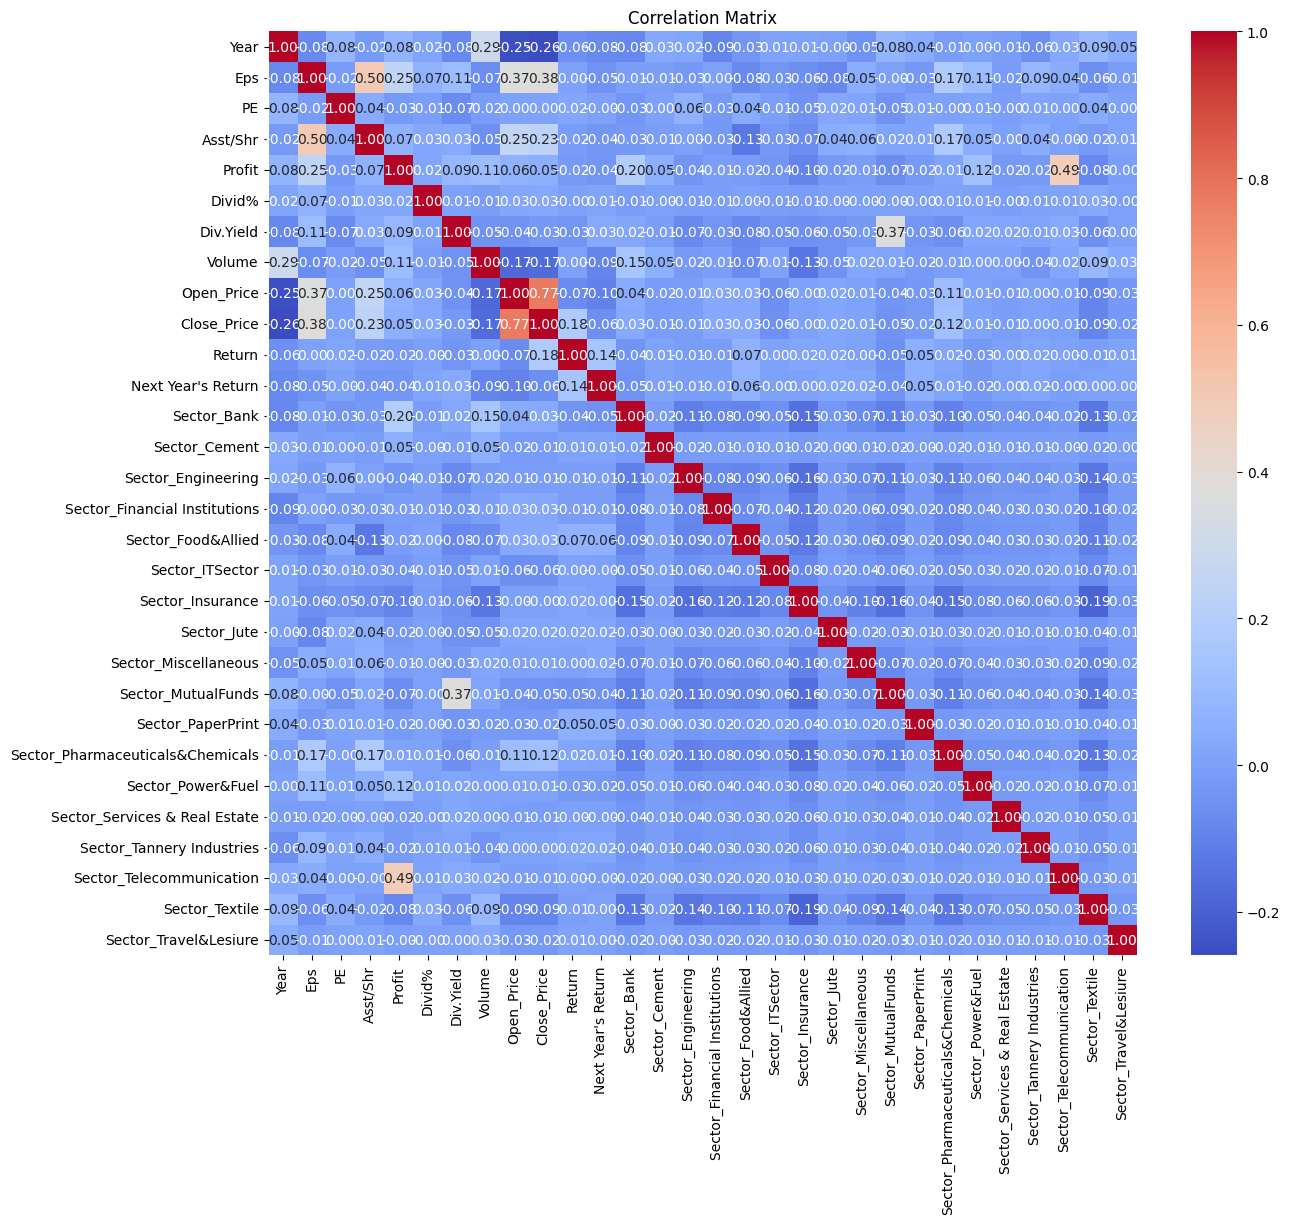

In [28]:
import pandas as pd

correlation_matrix = final_data.corr()
print(correlation_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Training Models

## Linear regression

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import numpy as np

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the training set
y_pred_train = model.predict(X_train)

# Calculate MSE_linear_regression
mse_linear_regression = mean_squared_error(y_train, y_pred_train)
print("Train MSE_linear_regression:", mse_linear_regression)

# Calculate RMSE_linear_regression
rmse_linear_regression = sqrt(mse_linear_regression)
print("Train RMSE_linear_regression:", rmse_linear_regression)

# Calculate MAE_linear_regression
mae_linear_regression = mean_absolute_error(y_train, y_pred_train)
print("Train MAE_linear_regression:", mae_linear_regression)

# # Calculate MAPE_linear_regression
# epsilon = 1e-10  # a small constant that we add to avoid division by zero
# mape_linear_regression = np.mean(np.abs((y_train - y_pred_train) / (y_train + epsilon))) * 100
# print("Train MAPE_linear_regression:", mape_linear_regression)

# # Calculate Median APE_linear_regression
# median_ape_train_linear_regression = np.median(np.abs((y_train - y_pred_train) / (y_train + epsilon))) * 100
# print("Train Median APE_linear_regression:", median_ape_train_linear_regression)

# # Calculate R-squared_linear_regression
# r2_linear_regression = r2_score(y_train, y_pred_train)
# print("Train R-squared_linear_regression:", r2_linear_regression)

# # Calculate Adjusted R-squared_linear_regression
# n = X_train.shape[0]  # number of observations
# p = X_train.shape[1]  # number of predictors
# adjusted_r2_linear_regression = 1 - (1 - r2_linear_regression) * ((n - 1) / (n - p - 1))
# print("Train Adjusted R-squared_linear_regression:", adjusted_r2_linear_regression)

print()

# Make predictions on the testing set
y_pred_test = model.predict(X_test)

# Calculate MSE_linear_regression
mse_linear_regression = mean_squared_error(y_test, y_pred_test)
print("Test MSE_linear_regression:", mse_linear_regression)

# Calculate RMSE_linear_regression
rmse_linear_regression = sqrt(mse_linear_regression)
print("Test RMSE_linear_regression:", rmse_linear_regression)

# Calculate MAE_linear_regression
mae_linear_regression = mean_absolute_error(y_test, y_pred_test)
print("Test MAE_linear_regression:", mae_linear_regression)

# # Calculate MAPE_linear_regression
# epsilon = 1e-10  # a small constant that we add to y_test to avoid division by zero
# mape_linear_regression = np.mean(np.abs((y_test - y_pred_test) / (y_test + epsilon))) * 100
# print("Test MAPE_linear_regression:", mape_linear_regression)

# # Calculate Median APE_linear_regression
# median_ape_linear_regression = np.median(np.abs((y_test - y_pred_test) / (y_test + epsilon))) * 100
# print("Test Median APE_linear_regression:", median_ape_linear_regression)

# # Calculate R-squared_linear_regression
# r2_linear_regression = r2_score(y_test, y_pred_test)
# print("Test R-squared_linear_regression:", r2_linear_regression)

# # Calculate Adjusted R-squared_linear_regression
# n = X_test.shape[0]  # number of observations
# p = X_test.shape[1]  # number of predictors
# adjusted_r2_linear_regression = 1 - (1 - r2_linear_regression) * ((n - 1) / (n - p - 1))
# print("Test Adjusted R-squared_linear_regression:", adjusted_r2_linear_regression)

Train MSE_linear_regression: 0.46835169309106905
Train RMSE_linear_regression: 0.6843622528245323
Train MAE_linear_regression: 0.4000423438236162

Test MSE_linear_regression: 1.5588070021581841
Test RMSE_linear_regression: 1.2485219269833365
Test MAE_linear_regression: 0.3548078988069757


## SVR

In [30]:
from sklearn.svm import SVR

# Train a SVR model
model = SVR(kernel='rbf')
model.fit(X_train, y_train.ravel())

# Make predictions on the training set
y_pred_train = model.predict(X_train)

# Calculate MSE
mse_SVR = mean_squared_error(y_train, y_pred_train)
print("train MSE_SVR:", mse_SVR)

# Calculate RMSE_SVR
rmse_SVR = sqrt(mse_SVR)
print("train RMSE_SVR:", rmse_SVR)

# Calculate MAE_SVR
mae_SVR = mean_absolute_error(y_train, y_pred_train)
print("train MAE_SVR:", mae_SVR)

# # Calculate MAPE_SVR
# epsilon = 1e-10  # a small constant that we add to avoid division by zero
# mape_SVR = np.mean(np.abs((y_train - y_pred_train) / (y_train + epsilon))) * 100
# print("Train MAPE_SVR:", mape_SVR)

# # Calculate Median APE_SVR
# median_ape_train_SVR = np.median(np.abs((y_train - y_pred_train) / (y_train + epsilon))) * 100
# print("Train Median APE_SVR:", median_ape_train_SVR)

# # Calculate R-squared_SVR
# r2_SVR = r2_score(y_train, y_pred_train)
# print("Train R-squared_SVR:", r2_SVR)

# # Calculate Adjusted R-squared_SVR
# n = X_train.shape[0]  # number of observations
# p = X_train.shape[1]  # number of predictors
# adjusted_r2_SVR = 1 - (1 - r2_SVR) * ((n - 1) / (n - p - 1))
# print("Train Adjusted R-squared_SVR:", adjusted_r2_SVR)

print()

# Make predictions on the testing set
y_pred_test = model.predict(X_test)

# Calculate MSE
mse_SVR = mean_squared_error(y_test, y_pred_test)
print("Test MSE:", mse_SVR)

# Calculate RMSE_SVR
rmse_SVR = sqrt(mse_SVR)
print("Test RMSE_SVR:", rmse_SVR)

# Calculate MAE_SVR
mae_SVR = mean_absolute_error(y_test, y_pred_test)
print("Test MAE_SVR:", mae_SVR)

# # Calculate MAPE_SVR
# epsilon = 1e-10  # a small constant that we add to y_test to avoid division by zero
# mape_SVR = np.mean(np.abs((y_test - y_pred_test) / (y_test + epsilon))) * 100
# print("Test MAPE_SVR:", mape_SVR)

# # Calculate Median APE_SVR
# median_ape_SVR = np.median(np.abs((y_test - y_pred_test) / (y_test + epsilon))) * 100
# print("Test Median APE_SVR:", median_ape_SVR)

# # Calculate R-squared_SVR
# r2_SVR = r2_score(y_test, y_pred_test)
# print("Test R-squared_SVR:", r2_SVR)

# # Calculate Adjusted R-squared_SVR
# n = X_test.shape[0]  # number of observations
# p = X_test.shape[1]  # number of predictors
# adjusted_r2_SVR = 1 - (1 - r2_SVR) * ((n - 1) / (n - p - 1))
# print("Test Adjusted R-squared_SVR:", adjusted_r2_SVR)

<ipython-input-30-115037ba6cd4>:5: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  model.fit(X_train, y_train.ravel())


train MSE_SVR: 0.5245323692007968
train RMSE_SVR: 0.7242460695100781
train MAE_SVR: 0.4024126880313822

Test MSE: 0.31951954890983186
Test RMSE_SVR: 0.565260602651407
Test MAE_SVR: 0.28660141729465277


In [31]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Define the SVR model
model = SVR()

# Define the hyperparameters to tune
param_grid = {
    'kernel': ['rbf'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], # Regularization parameter
    'epsilon': [0.001, 0.01, 0.05, 0.1, 0.2, 0.5, 0.8, 1, 1.5], # Margin of tolerance
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train.ravel())

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Instantiate SVR with best hyperparameters
best_model = SVR(**best_params)

# Train the model with best hyperparameters
best_model.fit(X_train, y_train.ravel())

Fitting 5 folds for each of 63 candidates, totalling 315 fits


<ipython-input-31-6390c9df7a4e>:16: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  grid_search.fit(X_train, y_train.ravel())


[CV] END .................C=0.001, epsilon=0.001, kernel=rbf; total time=   2.2s
[CV] END .................C=0.001, epsilon=0.001, kernel=rbf; total time=   3.7s
[CV] END .................C=0.001, epsilon=0.001, kernel=rbf; total time=   1.9s
[CV] END .................C=0.001, epsilon=0.001, kernel=rbf; total time=   1.0s
[CV] END .................C=0.001, epsilon=0.001, kernel=rbf; total time=   0.8s
[CV] END ..................C=0.001, epsilon=0.01, kernel=rbf; total time=   0.8s
[CV] END ..................C=0.001, epsilon=0.01, kernel=rbf; total time=   0.8s
[CV] END ..................C=0.001, epsilon=0.01, kernel=rbf; total time=   0.8s
[CV] END ..................C=0.001, epsilon=0.01, kernel=rbf; total time=   0.8s
[CV] END ..................C=0.001, epsilon=0.01, kernel=rbf; total time=   0.8s
[CV] END ..................C=0.001, epsilon=0.05, kernel=rbf; total time=   0.8s
[CV] END ..................C=0.001, epsilon=0.05, kernel=rbf; total time=   0.8s
[CV] END ..................C

<ipython-input-31-6390c9df7a4e>:26: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  best_model.fit(X_train, y_train.ravel())


SVR(C=0.001, epsilon=0.5)

In [32]:
# Make predictions on the training set
y_pred_train = best_model.predict(X_train)

# Calculate MSE
mse_SVR = mean_squared_error(y_train, y_pred_train)
print("train MSE_SVR:", mse_SVR)

# Calculate RMSE_SVR
rmse_SVR = sqrt(mse_SVR)
print("train RMSE_SVR:", rmse_SVR)

# Calculate MAE_SVR
mae_SVR = mean_absolute_error(y_train, y_pred_train)
print("train MAE_SVR:", mae_SVR)

# # Calculate MAPE_SVR
# epsilon = 1e-10  # a small constant that we add to avoid division by zero
# mape_SVR = np.mean(np.abs((y_train - y_pred_train) / (y_train + epsilon))) * 100
# print("Train MAPE_SVR:", mape_SVR)

# # Calculate Median APE_SVR
# median_ape_train_SVR = np.median(np.abs((y_train - y_pred_train) / (y_train + epsilon))) * 100
# print("Train Median APE_SVR:", median_ape_train_SVR)

# # Calculate R-squared_SVR
# r2_SVR = r2_score(y_train, y_pred_train)
# print("Train R-squared_SVR:", r2_SVR)

# # Calculate Adjusted R-squared_SVR
# n = X_train.shape[0]  # number of observations
# p = X_train.shape[1]  # number of predictors
# adjusted_r2_SVR = 1 - (1 - r2_SVR) * ((n - 1) / (n - p - 1))
# print("Train Adjusted R-squared_SVR:", adjusted_r2_SVR)

print()

# Make predictions on the testing set
y_pred_test = best_model.predict(X_test)

# Calculate MSE
mse_SVR = mean_squared_error(y_test, y_pred_test)
print("Test MSE:", mse_SVR)

# Calculate RMSE_SVR
rmse_SVR = sqrt(mse_SVR)
print("Test RMSE_SVR:", rmse_SVR)

# Calculate MAE_SVR
mae_SVR = mean_absolute_error(y_test, y_pred_test)
print("Test MAE_SVR:", mae_SVR)

# # Calculate MAPE_SVR
# epsilon = 1e-10  # a small constant that we add to y_test to avoid division by zero
# mape_SVR = np.mean(np.abs((y_test - y_pred_test) / (y_test + epsilon))) * 100
# print("Test MAPE_SVR:", mape_SVR)

# # Calculate Median APE_SVR
# median_ape_SVR = np.median(np.abs((y_test - y_pred_test) / (y_test + epsilon))) * 100
# print("Test Median APE_SVR:", median_ape_SVR)

# # Calculate R-squared_SVR
# r2_SVR = r2_score(y_test, y_pred_test)
# print("Test R-squared_SVR:", r2_SVR)

# # Calculate Adjusted R-squared_SVR
# n = X_test.shape[0]  # number of observations
# p = X_test.shape[1]  # number of predictors
# adjusted_r2_SVR = 1 - (1 - r2_SVR) * ((n - 1) / (n - p - 1))
# print("Test Adjusted R-squared_SVR:", adjusted_r2_SVR)

train MSE_SVR: 0.509789983489828
train RMSE_SVR: 0.7139957867451515
train MAE_SVR: 0.4231399247476467

Test MSE: 0.2867015977937672
Test RMSE_SVR: 0.5354452332347046
Test MAE_SVR: 0.29304318598515744


## Random Forest Regression

In [33]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest Regression model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions on the training set
y_pred_train = model.predict(X_train)

# Calculate MSE
mse_RFR = mean_squared_error(y_train, y_pred_train)
print("train MSE:", mse_RFR)

# Calculate RMSE_RFR
rmse_RFR = sqrt(mse_RFR)
print("train RMSE_RFR:", rmse_RFR)

# Calculate MAE_RFR
mae_RFR = mean_absolute_error(y_train, y_pred_train)
print("train MAE_RFR:", mae_RFR)

# # Calculate MAPE_RFR
# epsilon = 1e-10  # a small constant that we add to avoid division by zero
# mape_RFR = np.mean(np.abs((y_train - y_pred_train) / (y_train + epsilon))) * 100
# print("Train MAPE_RFR:", mape_RFR)

# # Calculate Median APE_RFR
# median_ape_train_RFR = np.median(np.abs((y_train - y_pred_train) / (y_train + epsilon))) * 100
# print("Train Median APE_RFR:", median_ape_train_RFR)

# # Calculate R-squared_RFR
# r2_RFR = r2_score(y_train, y_pred_train)
# print("Train R-squared_RFR:", r2_RFR)

# # Calculate Adjusted R-squared_RFR
# n = X_train.shape[0]  # number of observations
# p = X_train.shape[1]  # number of predictors
# adjusted_r2_RFR = 1 - (1 - r2_RFR) * ((n - 1) / (n - p - 1))
# print("Train Adjusted R-squared_RFR:", adjusted_r2_RFR)

print()

# Make predictions on the testing set
y_pred_test = model.predict(X_test)

# Calculate MSE
mse_RFR = mean_squared_error(y_test, y_pred_test)
print("Test MSE_RFR:", mse_RFR)

# Calculate RMSE_RFR
rmse_RFR = sqrt(mse_RFR)
print("Test RMSE_RFR:", rmse_RFR)

# Calculate MAE_RFR
mae_RFR = mean_absolute_error(y_test, y_pred_test)
print("Test MAE_RFR:", mae_RFR)

# # Calculate MAPE_RFR
# epsilon = 1e-10  # a small constant that we add to y_test to avoid division by zero
# mape_RFR = np.mean(np.abs((y_test - y_pred_test) / (y_test + epsilon))) * 100
# print("Test MAPE_RFR:", mape_RFR)

# # Calculate Median APE_RFR
# median_ape_RFR = np.median(np.abs((y_test - y_pred_test) / (y_test + epsilon))) * 100
# print("Test Median APE_RFR:", median_ape_RFR)

# # Calculate R-squared_RFR
# r2_RFR = r2_score(y_test, y_pred_test)
# print("Test R-squared_RFR:", r2_RFR)

# # Calculate Adjusted R-squared_RFR
# n = X_test.shape[0]  # number of observations
# p = X_test.shape[1]  # number of predictors
# adjusted_r2_RFR = 1 - (1 - r2_RFR) * ((n - 1) / (n - p - 1))
# print("Test Adjusted R-squared_RFR:", adjusted_r2_RFR)

train MSE: 0.05413391909823583
train RMSE_RFR: 0.23266697036372788
train MAE_RFR: 0.11887227644037936

Test MSE_RFR: 0.4518754908121364
Test RMSE_RFR: 0.6722168480573336
Test MAE_RFR: 0.4463666792453896


In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10],  # Maximum depth of the tree
    'min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2],  # Minimum number of samples required to be at a leaf node
}

# Instantiate the Random Forest Regression model
rf_model = RandomForestRegressor()

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train a Random Forest Regression model with the best parameters
best_rf_model = RandomForestRegressor(**best_params)
best_rf_model.fit(X_train, y_train)

# Make predictions on the training set
y_pred_train = best_rf_model.predict(X_train)

# Calculate MSE
mse_RFR = mean_squared_error(y_train, y_pred_train)
print("Train MSE:", mse_RFR)

# Calculate RMSE
rmse_RFR = sqrt(mse_RFR)
print("Train RMSE:", rmse_RFR)

# Calculate MAE
mae_RFR = mean_absolute_error(y_train, y_pred_train)
print("Train MAE:", mae_RFR)

print()

# Make predictions on the testing set
y_pred_test = best_rf_model.predict(X_test)

# Calculate MSE
mse_RFR = mean_squared_error(y_test, y_pred_test)
print("Test MSE:", mse_RFR)

# Calculate RMSE
rmse_RFR = sqrt(mse_RFR)
print("Test RMSE:", rmse_RFR)

# Calculate MAE
mae_RFR = mean_absolute_error(y_test, y_pred_test)
print("Test MAE:", mae_RFR)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Train MSE: 0.1137838742489119
Train RMSE: 0.33731865387036025
Train MAE: 0.14955484718054213

Test MSE: 0.3669024970270187
Test RMSE: 0.6057247700292755
Test MAE: 0.4182954270307578


## LSTM

In [35]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3750, 29)
(937, 29)
(3750,)
(937,)


In [36]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

# Define time steps and calculate features per timestep
timesteps = 1
features_per_timestep = X_train.shape[1] // timesteps

# Convert DataFrames to NumPy arrays and reshape
X_train = X_train.to_numpy() if isinstance(X_train, pd.DataFrame) else X_train
X_test = X_test.to_numpy() if isinstance(X_test, pd.DataFrame) else X_test

# Reshape data for LSTM (samples, timesteps, features)
X_train_reshaped = X_train.reshape(X_train.shape[0], timesteps, features_per_timestep)
X_test_reshaped = X_test.reshape(X_test.shape[0], timesteps, features_per_timestep)

# Convert features to float32
X_train_reshaped = X_train_reshaped.astype(np.float32)
X_test_reshaped = X_test_reshaped.astype(np.float32)

# Convert labels to binary and float32 for compatibility with TensorFlow
y_train = (y_train > 0.5).astype(np.float32)  # Ensure binary values 0.0 or 1.0
y_test = (y_test > 0.5).astype(np.float32)

# Initialize the RNN model
model = Sequential()

# Add input and LSTM layers
model.add(Input(shape=(timesteps, features_per_timestep)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# Train the model
model.fit(X_train_reshaped, y_train, epochs=20, batch_size=32)

# Evaluate and make predictions
y_pred_train = model.predict(X_train_reshaped).flatten()
y_pred_test = model.predict(X_test_reshaped).flatten()

# Evaluation metrics for training set
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
epsilon = 1e-10  # Small constant to avoid division by zero
mape_train = np.mean(np.abs((y_train - y_pred_train) / (y_train + epsilon))) * 100
median_ape_train = np.median(np.abs((y_train - y_pred_train) / (y_train + epsilon))) * 100
r2_train = r2_score(y_train, y_pred_train)
n_train = X_train.shape[0]
p_train = X_train.shape[1]
adjusted_r2_train = 1 - (1 - r2_train) * ((n_train - 1) / (n_train - p_train - 1))

# Print training metrics
print("Train MSE:", mse_train)
print("Train RMSE:", rmse_train)
print("Train MAE:", mae_train)
# print("Train MAPE:", mape_train)
# print("Train Median APE:", median_ape_train)
# print("Train R-squared:", r2_train)
# print("Train Adjusted R-squared:", adjusted_r2_train)

# Evaluation metrics for test set
mse_LSTM = mean_squared_error(y_test, y_pred_test)
rmse_LSTM = sqrt(mse_LSTM)
mae_LSTM = mean_absolute_error(y_test, y_pred_test)
mape_LSTM = np.mean(np.abs((y_test - y_pred_test) / (y_test + epsilon))) * 100
median_ape_LSTM = np.median(np.abs((y_test - y_pred_test) / (y_test + epsilon))) * 100
r2_LSTM = r2_score(y_test, y_pred_test)
n_test = X_test.shape[0]
p_test = X_test.shape[1]
adjusted_r2_LSTM = 1 - (1 - r2_LSTM) * ((n_test - 1) / (n_test - p_test - 1))

# Print test metrics
print("Test MSE:", mse_LSTM)
print("Test RMSE:", rmse_LSTM)
print("Test MAE:", mae_LSTM)
# print("Test MAPE:", mape_LSTM)
# print("Test Median APE:", median_ape_LSTM)
# print("Test R-squared:", r2_LSTM)
# print("Test Adjusted R-squared:", adjusted_r2_LSTM)

Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.1303 - mean_squared_error: 0.1303
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1272 - mean_squared_error: 0.1272
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1335 - mean_squared_error: 0.1335
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1305 - mean_squared_error: 0.1305
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1280 - mean_squared_error: 0.1280
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1243 - mean_squared_error: 0.1243
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1235 - mean_squared_error: 0.1235
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1325 - mean_squared_error: 0.1325
Epoch 9/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1343 - mean_squared_error: 0.1343
Epoch 10/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1309 - mean_squared_error: 0.1309
Epoch 11/20
118/118 ━━━━━━━━━━━━━━━━━━━

## BiLSTM

In [37]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional, Input
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from math import sqrt

# Ensure data is in correct numeric format
X_train_reshaped = np.array(X_train, dtype=np.float32).reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = np.array(X_test, dtype=np.float32).reshape((X_test.shape[0], 1, X_test.shape[1]))
y_train = np.array(y_train, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

# Initialize the BiLSTM model
model = Sequential()

# Adding the input layer and the BiLSTM layers
model.add(Input(shape=(1, X_train.shape[1])))  # Explicit input definition
model.add(Bidirectional(LSTM(units=50, return_sequences=True)))
model.add(Bidirectional(LSTM(units=50, return_sequences=True)))
model.add(Bidirectional(LSTM(units=50)))
model.add(Dense(units=1))  # Output layer

# Compile the RNN
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the RNN to the Training set
model.fit(X_train_reshaped, y_train, epochs=20, batch_size=32)

# Making predictions
y_pred_train = model.predict(X_train_reshaped).flatten()
y_pred_test = model.predict(X_test_reshaped).flatten()

# Evaluation metrics for training set
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
epsilon = 1e-10  # Small constant to avoid division by zero
mape_train = np.mean(np.abs((y_train - y_pred_train) / (y_train + epsilon))) * 100
median_ape_train = np.median(np.abs((y_train - y_pred_train) / (y_train + epsilon))) * 100
r2_train = r2_score(y_train, y_pred_train)
n_train = X_train.shape[0]
p_train = X_train.shape[1]
adjusted_r2_train = 1 - (1 - r2_train) * ((n_train - 1) / (n_train - p_train - 1))
# Print training metrics
print("Train MSE:", mse_train)
print("Train RMSE:", rmse_train)
print("Train MAE:", mae_train)
# print("Train MAPE:", mape_train)
# print("Train Median APE:", median_ape_train)
# print("Train R-squared:", r2_train)
# print("Train Adjusted R-squared:", adjusted_r2_train)

# Evaluate testing performance
mse_biLSTM = mean_squared_error(y_test, y_pred_test)
print('Test MSE_biLSTM:', mse_biLSTM)

rmse_biLSTM = sqrt(mse_biLSTM)
print('Test RMSE_biLSTM:', rmse_biLSTM)

mae_biLSTM = mean_absolute_error(y_test, y_pred_test)
print('Test MAE_biLSTM:', mae_biLSTM)

# epsilon = 1e-10  # Small constant to avoid division by zero
# mape_biLSTM = np.mean(np.abs((y_test - y_pred_test) / (y_test + epsilon))) * 100
# print('Test MAPE_biLSTM:', mape_biLSTM)

# median_ape_biLSTM = np.median(np.abs((y_test - y_pred_test) / (y_test + epsilon))) * 100
# print("Test Median APE_biLSTM:", median_ape_biLSTM)

# r2_biLSTM = r2_score(y_test, y_pred_test)
# print('Test R2_biLSTM:', r2_biLSTM)

# n = X_test.shape[0]
# p = X_test.shape[1]
# adjusted_r2_biLSTM = 1 - (1 - r2_biLSTM) * (n - 1) / (n - p - 1)
# print('Test Adjusted R2_biLSTM:', adjusted_r2_biLSTM)


Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 0.1264
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1275
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1291
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1269
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1333
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.1286
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1237
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1267
Epoch 9/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1214
Epoch 10/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1387
Epoch 11/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1212
Epoch 12/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1277
Epoch 13/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1366
Epoch 14/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1325
Epoch 15/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step 

# Model Comparison

In [38]:
print("Linear Regression")
print('Test MSE_linear_regression:', mse_linear_regression)
print('Test RMSE_linear_regression:', rmse_linear_regression)
print('Test MAE_linear_regression:', mae_linear_regression)
# print('Test MAPE_linear_regression:', mape_linear_regression)
# print("Test Median APE_linear_regression:", median_ape_linear_regression)
# print("Test R-squared_linear_regression:", r2_linear_regression)
# print("Test Adjusted R-squared_linear_regression:", adjusted_r2_linear_regression)

print("\nSVR")
print('Test MSE_SVR:', mse_SVR)
print('Test RMSE_SVR:', rmse_SVR)
print('Test MAE_SVR:', mae_SVR)
# print('Test MAPE_SVR:', mape_SVR)
# print("Test Median APE_SVR:", median_ape_SVR)
# print("Test R-squared_SVR:", r2_SVR)
# print("Test Adjusted R-squared_SVR:", adjusted_r2_SVR)

print("\nRandom Forest Regression")
print('Test MSE_RFR:', mse_RFR)
print('Test RMSE_RFR:', rmse_RFR)
print('Test MAE_RFR:', mae_RFR)
# print('Test MAPE_RFR:', mape_RFR)
# print("Test Median APE_RFR:", median_ape_RFR)
# print("Test R-squared_RFR:", r2_RFR)
# print("Test Adjusted R-squared_RFR:", adjusted_r2_RFR)

print("\nLSTM")
print('Test MSE_LSTM:', mse_LSTM)
print('Test RMSE_LSTM:', rmse_LSTM)
print('Test MAE_LSTM:', mae_LSTM)
# print('Test MAPE_LSTM:', mape_LSTM)
# print("Test Median APE_LSTM:", median_ape_LSTM)
# print("Test R-squared_LSTM:", r2_LSTM)
# print("Test Adjusted R-squared_LSTM:", adjusted_r2_LSTM)

print("\nBiLSTM")
print('Test MSE_biLSTM:', mse_biLSTM)
print('Test RMSE_biLSTM:', rmse_biLSTM)
print('Test MAE_biLSTM:', mae_biLSTM)
# print('Test MAPE_biLSTM:', mape_biLSTM)
# print('Test median_ape_biLSTM:', median_ape_biLSTM)
# print('Test r2_biLSTM:', r2_biLSTM)
# print('Test adjusted_r2_biLSTM:', adjusted_r2_biLSTM)

Linear Regression
Test MSE_linear_regression: 1.5588070021581841
Test RMSE_linear_regression: 1.2485219269833365
Test MAE_linear_regression: 0.3548078988069757

SVR
Test MSE_SVR: 0.2867015977937672
Test RMSE_SVR: 0.5354452332347046
Test MAE_SVR: 0.29304318598515744

Random Forest Regression
Test MSE_RFR: 0.3669024970270187
Test RMSE_RFR: 0.6057247700292755
Test MAE_RFR: 0.4182954270307578

LSTM
Test MSE_LSTM: 0.10636699944734573
Test RMSE_LSTM: 0.32613953984045807
Test MAE_LSTM: 0.23553505539894104

BiLSTM
Test MSE_biLSTM: 0.10724025219678879
Test RMSE_biLSTM: 0.327475574962147
Test MAE_biLSTM: 0.244333878159523


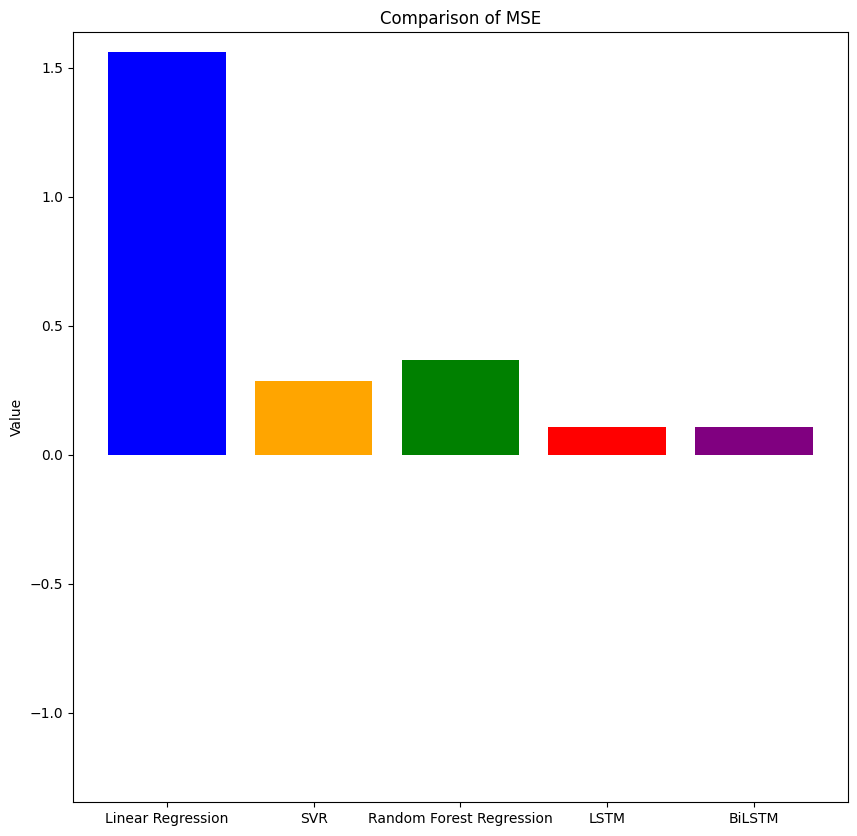

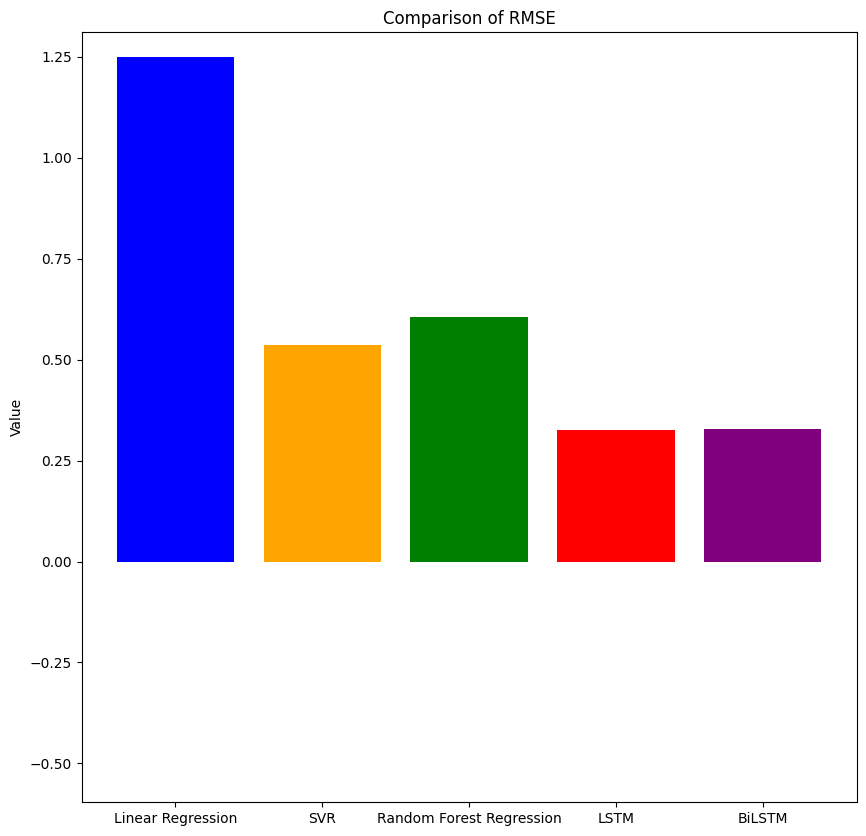

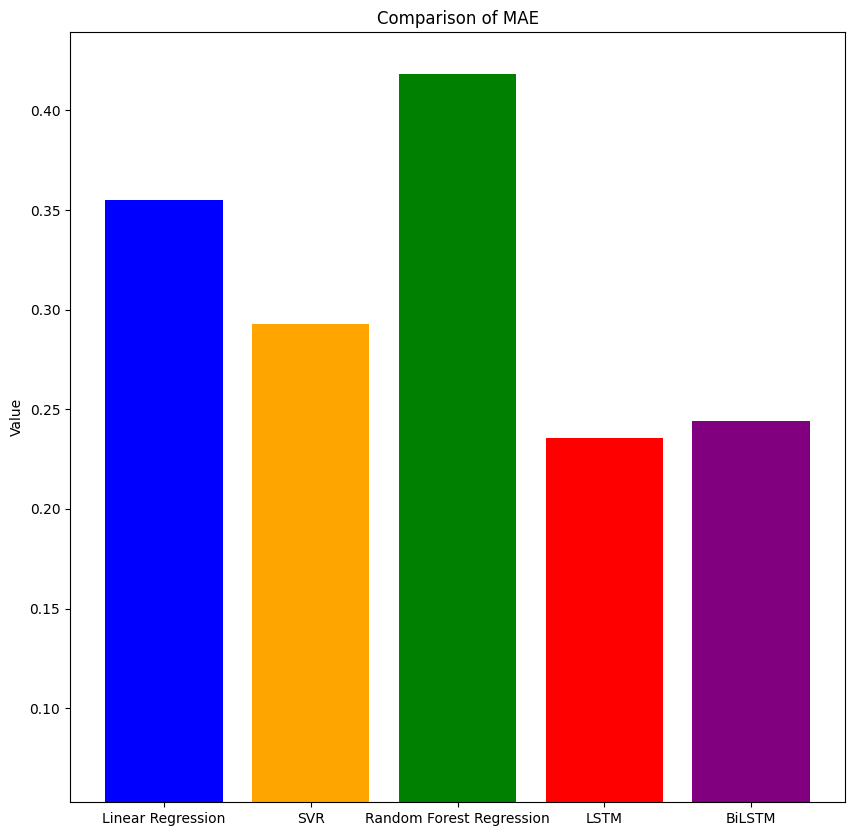

In [39]:
import matplotlib.pyplot as plt

# Define the models and their corresponding MSE, RMSE, and MAE
models = ['Linear Regression', 'SVR', 'Random Forest Regression', 'LSTM', 'BiLSTM']
mse_values = [mse_linear_regression, mse_SVR, mse_RFR, mse_LSTM, mse_biLSTM]
rmse_values = [rmse_linear_regression, rmse_SVR, rmse_RFR, rmse_LSTM, rmse_biLSTM]
mae_values = [mae_linear_regression, mae_SVR, mae_RFR, mae_LSTM, mae_biLSTM]
# mape_values = [mape_linear_regression, mape_SVR, mape_RFR, mape_LSTM, mape_biLSTM]
# median_ape_values = [median_ape_linear_regression, median_ape_SVR, median_ape_RFR, median_ape_LSTM, median_ape_biLSTM]
# r2_values = [r2_linear_regression, r2_SVR, r2_RFR, r2_LSTM, r2_biLSTM]
# adjusted_r2_values = [adjusted_r2_linear_regression, adjusted_r2_SVR, adjusted_r2_RFR, adjusted_r2_LSTM, adjusted_r2_biLSTM]

# Create a function to plot the bar graphs
def plot_graph(models, values, title):
    plt.figure(figsize=(10, 10))
    plt.bar(models, values, color=['blue', 'orange', 'green', 'red', 'purple'])
    plt.title(title)
    plt.ylabel('Value')
    min_val = min(values)
    max_val = max(values)
    plt.ylim(min_val - 1 * (max_val - min_val))
    plt.show()

# Plot the MSE, RMSE, and MAE bar graphs
plot_graph(models, mse_values, 'Comparison of MSE')
plot_graph(models, rmse_values, 'Comparison of RMSE')
plot_graph(models, mae_values, 'Comparison of MAE')
# plot_graph(models, mape_values, 'Comparison of MAPE')
# plot_graph(models, median_ape_values, 'Comparison of Median APE')
# plot_graph(models, r2_values, 'Comparison of r2 scores')
# plot_graph(models, adjusted_r2_values, 'Comparison of adjusted r2 scores')

# **USING ONLY TECHNICAL DATA**

## Label

In [ ]:
import pandas as pd

# Shift the Stock Return column to get the next year's return as the target variable
yearly_price_data["Next Year's Return"] = yearly_price_data.groupby("Symbol")["Return"].shift(-1)

# Drop rows where Next Year's Stock Return is NaN (since we can't predict those)
yearly_price_data.dropna(subset=["Next Year's Return"], inplace=True)

# Sort the data by the "Year" column in descending order ("Year" is the column indicating time)
yearly_price_data_sorted = yearly_price_data.sort_values(by="Year", ascending=False)

# Dropping "Symbol" column
yearly_price_data_sorted = yearly_price_data_sorted.drop(columns=["Symbol"])

## Train test split

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Calculate the index where 20% of the data lies
test_index = int(0.2 * len(yearly_price_data_sorted))

# Split the data into training and testing sets
X_train = yearly_price_data_sorted.iloc[test_index:]  # Use data from the test_index onwards for training
X_test = yearly_price_data_sorted.iloc[:test_index]  # Use data up to the test_index for testing

# Separate the target variable
y_train = X_train["Next Year's Return"]
y_test = X_test["Next Year's Return"]

# Drop the target variable from the feature sets
X_train = X_train.drop(columns=["Next Year's Return"])
X_test = X_test.drop(columns=["Next Year's Return"])

## Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train.iloc[:, 1:] = scaler.fit_transform(X_train.iloc[:, 1:])
X_test.iloc[:, 1:] = scaler.transform(X_test.iloc[:, 1:])

print(X_train)
print(X_test)
print(y_train)
print(y_test)

      Year  Open_Price  Close_Price    Return    Volume
5581  2020   -0.297630    -0.272745  0.091305  0.024341
3065  2020   -0.347886    -0.327528  0.556546 -0.083872
4655  2020   -0.331881    -0.310908  0.078924 -0.172002
153   2020   -0.346712    -0.325476  0.687081  0.802636
1749  2020   -0.347886    -0.323937  2.264480 -0.104285
...    ...         ...          ...       ...       ...
6633  1999   -0.088497    -0.125990 -0.386934 -0.186072
15    1999   -0.278691    -0.280388 -0.492163 -0.186103
4272  1999   -0.282959    -0.266281 -0.121078 -0.185718
611   1999    0.118501    -0.022374 -0.571273 -0.186023
2183  1999   -0.220806    -0.221398 -0.291921 -0.185535

[5023 rows x 5 columns]
      Year  Open_Price  Close_Price    Return    Volume
3405  2023   -0.328253    -0.310498 -0.153203 -0.169629
2625  2023   -0.340417    -0.316653  0.588092 -0.149563
2499  2023   -0.332414    -0.312447  0.003501  0.093088
2526  2023   -0.325906    -0.303727  0.114248  0.678224
2542  2023   -0.330494 

## Correlation

                                      Year       Eps        PE  Asst/Shr  \
Year                              1.000000 -0.076287  0.076236 -0.022042   
Eps                              -0.076287  1.000000 -0.016024  0.502447   
PE                                0.076236 -0.016024  1.000000  0.038449   
Asst/Shr                         -0.022042  0.502447  0.038449  1.000000   
Profit                            0.075255  0.245330 -0.026981  0.065241   
Divid%                            0.015863  0.067184 -0.005114  0.025915   
Div.Yield                        -0.081441  0.109359 -0.069440  0.033941   
Volume                            0.289730 -0.065387 -0.016314 -0.054010   
Open_Price                       -0.247137  0.367025  0.003506  0.253773   
Close_Price                      -0.259076  0.377846  0.001834  0.228405   
Return                           -0.056215  0.004315  0.020115 -0.016927   
Next Year's Return               -0.075601 -0.048260 -0.000065 -0.035142   
Sector_Bank 

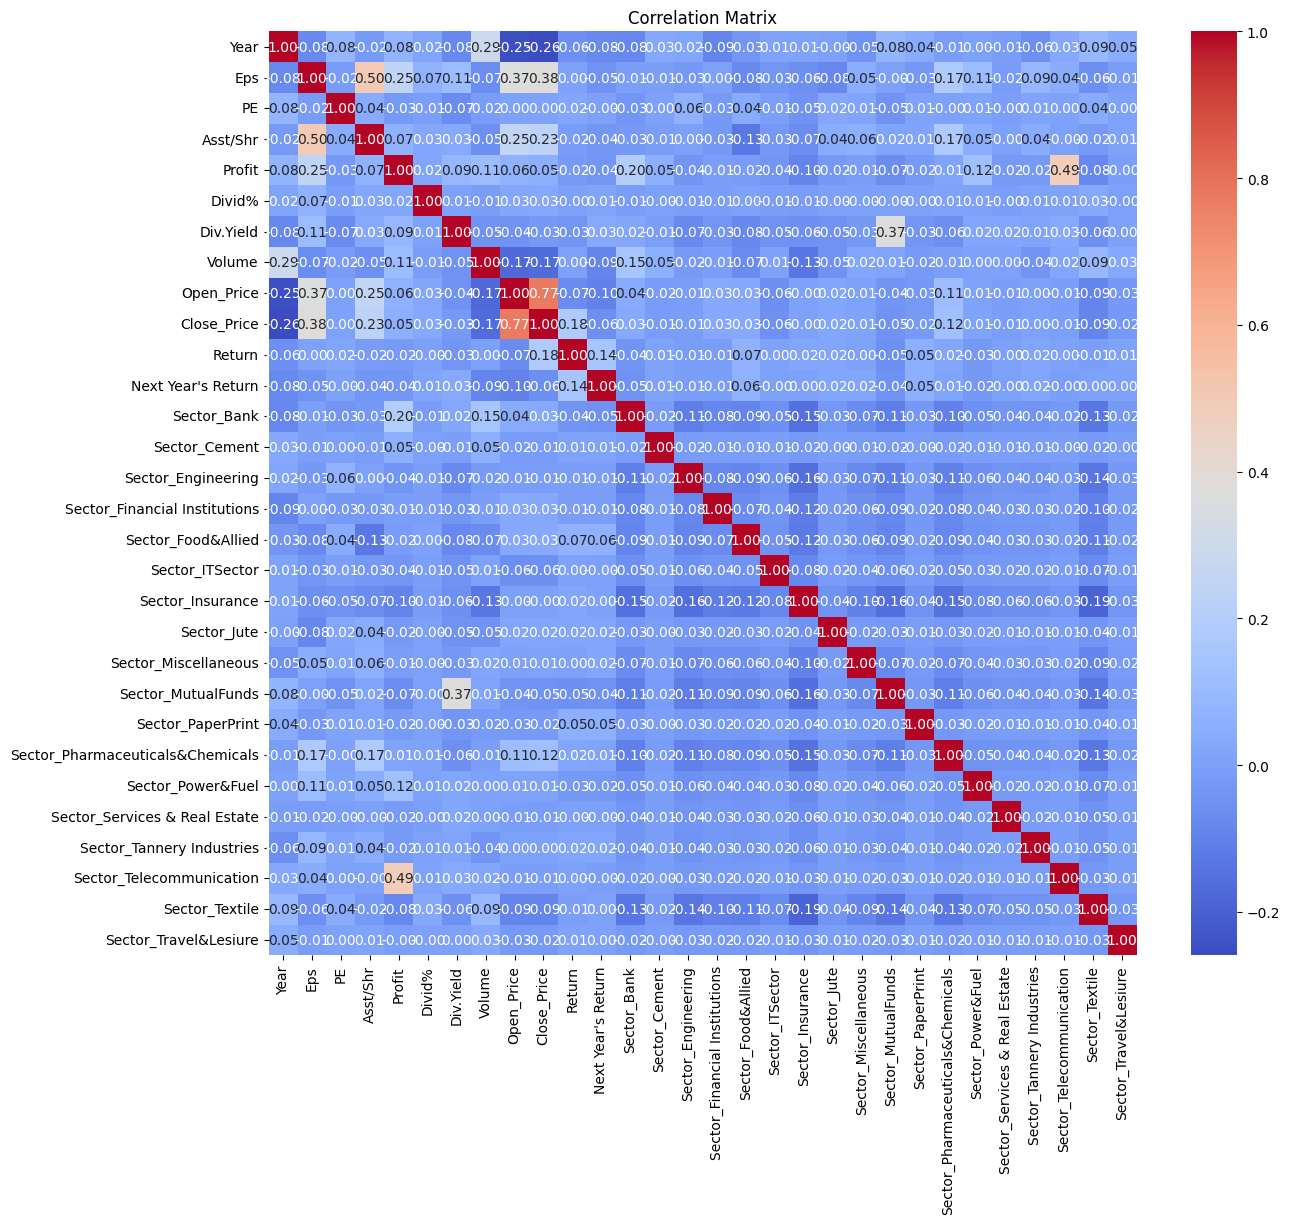

In [ ]:
import pandas as pd

correlation_matrix = final_data.corr()
print(correlation_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# import pandas as pd

# correlation_matrix = yearly_price_data.corr()
# print(correlation_matrix)

# import seaborn as sns
# import matplotlib.pyplot as plt

# # Plot the correlation matrix as a heatmap
# plt.figure(figsize=(14, 12))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Matrix')
# plt.show()

## Training Models

### Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import numpy as np

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the training set
y_pred_train = model.predict(X_train)

# Calculate MSE_linear_regression
mse_linear_regression = mean_squared_error(y_train, y_pred_train)
print("Train MSE_linear_regression:", mse_linear_regression)

# Calculate RMSE_linear_regression
rmse_linear_regression = sqrt(mse_linear_regression)
print("Train RMSE_linear_regression:", rmse_linear_regression)

# Calculate MAE_linear_regression
mae_linear_regression = mean_absolute_error(y_train, y_pred_train)
print("Train MAE_linear_regression:", mae_linear_regression)

# Calculate MAPE_linear_regression
epsilon = 1e-10  # a small constant that we add to avoid division by zero
mape_linear_regression = np.mean(np.abs((y_train - y_pred_train) / (y_train + epsilon))) * 100
print("Train MAPE_linear_regression:", mape_linear_regression)

# Calculate Median APE_linear_regression
median_ape_train_linear_regression = np.median(np.abs((y_train - y_pred_train) / (y_train + epsilon))) * 100
print("Train Median APE_linear_regression:", median_ape_train_linear_regression)

# Calculate R-squared_linear_regression
r2_linear_regression = r2_score(y_train, y_pred_train)
print("Train R-squared_linear_regression:", r2_linear_regression)

# Calculate Adjusted R-squared_linear_regression
n = X_train.shape[0]  # number of observations
p = X_train.shape[1]  # number of predictors
adjusted_r2_linear_regression = 1 - (1 - r2_linear_regression) * ((n - 1) / (n - p - 1))
print("Train Adjusted R-squared_linear_regression:", adjusted_r2_linear_regression)

print()

# Make predictions on the testing set
y_pred_test = model.predict(X_test)

# Calculate MSE_linear_regression
mse_linear_regression = mean_squared_error(y_test, y_pred_test)
print("Test MSE_linear_regression:", mse_linear_regression)

# Calculate RMSE_linear_regression
rmse_linear_regression = sqrt(mse_linear_regression)
print("Test RMSE_linear_regression:", rmse_linear_regression)

# Calculate MAE_linear_regression
mae_linear_regression = mean_absolute_error(y_test, y_pred_test)
print("Test MAE_linear_regression:", mae_linear_regression)

# Calculate MAPE_linear_regression
epsilon = 1e-10  # a small constant that we add to y_test to avoid division by zero
mape_linear_regression = np.mean(np.abs((y_test - y_pred_test) / (y_test + epsilon))) * 100
print("Test MAPE_linear_regression:", mape_linear_regression)

# Calculate Median APE_linear_regression
median_ape_linear_regression = np.median(np.abs((y_test - y_pred_test) / (y_test + epsilon))) * 100
print("Test Median APE_linear_regression:", median_ape_linear_regression)

# Calculate R-squared_linear_regression
r2_linear_regression = r2_score(y_test, y_pred_test)
print("Test R-squared_linear_regression:", r2_linear_regression)

# Calculate Adjusted R-squared_linear_regression
n = X_test.shape[0]  # number of observations
p = X_test.shape[1]  # number of predictors
adjusted_r2_linear_regression = 1 - (1 - r2_linear_regression) * ((n - 1) / (n - p - 1))
print("Test Adjusted R-squared_linear_regression:", adjusted_r2_linear_regression)

Train MSE_linear_regression: 0.5502363435468528
Train RMSE_linear_regression: 0.7417791743820076
Train MAE_linear_regression: 0.41517118538688746
Train MAPE_linear_regression: 811184420.5589648
Train Median APE_linear_regression: 110.43210194208359
Train R-squared_linear_regression: 0.024928988607321623
Train Adjusted R-squared_linear_regression: 0.023957221603741252

Test MSE_linear_regression: 0.16683225353345565
Test RMSE_linear_regression: 0.4084510417828012
Test MAE_linear_regression: 0.1945080160709109
Test MAPE_linear_regression: 3601502315.8234744
Test Median APE_linear_regression: 106.06172716420417
Test R-squared_linear_regression: -0.054363754411121956
Test Adjusted R-squared_linear_regression: -0.05858458609411277


### SVR

In [ ]:
from sklearn.svm import SVR

# Train a SVR model
model = SVR(kernel='rbf')
model.fit(X_train, y_train.ravel())

# Make predictions on the training set
y_pred_train = model.predict(X_train)

# Calculate MSE
mse_SVR = mean_squared_error(y_train, y_pred_train)
print("train MSE_SVR:", mse_SVR)

# Calculate RMSE_SVR
rmse_SVR = sqrt(mse_SVR)
print("train RMSE_SVR:", rmse_SVR)

# Calculate MAE_SVR
mae_SVR = mean_absolute_error(y_train, y_pred_train)
print("train MAE_SVR:", mae_SVR)

# Calculate MAPE_SVR
epsilon = 1e-10  # a small constant that we add to avoid division by zero
mape_SVR = np.mean(np.abs((y_train - y_pred_train) / (y_train + epsilon))) * 100
print("Train MAPE_SVR:", mape_SVR)

# Calculate Median APE_SVR
median_ape_train_SVR = np.median(np.abs((y_train - y_pred_train) / (y_train + epsilon))) * 100
print("Train Median APE_SVR:", median_ape_train_SVR)

# Calculate R-squared_SVR
r2_SVR = r2_score(y_train, y_pred_train)
print("Train R-squared_SVR:", r2_SVR)

# Calculate Adjusted R-squared_SVR
n = X_train.shape[0]  # number of observations
p = X_train.shape[1]  # number of predictors
adjusted_r2_SVR = 1 - (1 - r2_SVR) * ((n - 1) / (n - p - 1))
print("Train Adjusted R-squared_SVR:", adjusted_r2_SVR)

print()

# Make predictions on the testing set
y_pred_test = model.predict(X_test)

# Calculate MSE
mse_SVR = mean_squared_error(y_test, y_pred_test)
print("Test MSE:", mse_SVR)

# Calculate RMSE_SVR
rmse_SVR = sqrt(mse_SVR)
print("Test RMSE_SVR:", rmse_SVR)

# Calculate MAE_SVR
mae_SVR = mean_absolute_error(y_test, y_pred_test)
print("Test MAE_SVR:", mae_SVR)

# Calculate MAPE_SVR
epsilon = 1e-10  # a small constant that we add to y_test to avoid division by zero
mape_SVR = np.mean(np.abs((y_test - y_pred_test) / (y_test + epsilon))) * 100
print("Test MAPE_SVR:", mape_SVR)

# Calculate Median APE_SVR
median_ape_SVR = np.median(np.abs((y_test - y_pred_test) / (y_test + epsilon))) * 100
print("Test Median APE_SVR:", median_ape_SVR)

# Calculate R-squared_SVR
r2_SVR = r2_score(y_test, y_pred_test)
print("Test R-squared_SVR:", r2_SVR)

# Calculate Adjusted R-squared_SVR
n = X_test.shape[0]  # number of observations
p = X_test.shape[1]  # number of predictors
adjusted_r2_SVR = 1 - (1 - r2_SVR) * ((n - 1) / (n - p - 1))
print("Test Adjusted R-squared_SVR:", adjusted_r2_SVR)

<ipython-input-46-34dd94df89a9>:5: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  model.fit(X_train, y_train.ravel())


train MSE_SVR: 0.5792617367639621
train RMSE_SVR: 0.7610924626902845
train MAE_SVR: 0.4008192250487806
Train MAPE_SVR: 97464729.4897114
Train Median APE_SVR: 98.77283455892614
Train R-squared_SVR: -0.02650676232443594
Train Adjusted R-squared_SVR: -0.027529790789977415

Test MSE: 0.15970730845800304
Test RMSE_SVR: 0.3996339680983125
Test MAE_SVR: 0.1779942400759125
Test MAPE_SVR: 2490742480.7069974
Test Median APE_SVR: 95.26109480386971
Test R-squared_SVR: -0.009334788604933975
Test Adjusted R-squared_SVR: -0.013375360216643095


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Define the SVR model
model = SVR()

# Define the hyperparameters to tune
param_grid = {
    'kernel': ['rbf'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], # Regularization parameter
    'epsilon': [0.001, 0.01, 0.05, 0.1, 0.2, 0.5, 0.8, 1, 1.5], # Margin of tolerance
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train.ravel())

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Instantiate SVR with best hyperparameters
best_model = SVR(**best_params)

# Train the model with best hyperparameters
best_model.fit(X_train, y_train.ravel())

Fitting 5 folds for each of 63 candidates, totalling 315 fits


<ipython-input-47-6390c9df7a4e>:16: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  grid_search.fit(X_train, y_train.ravel())


[CV] END .................C=0.001, epsilon=0.001, kernel=rbf; total time=   0.6s
[CV] END .................C=0.001, epsilon=0.001, kernel=rbf; total time=   0.6s
[CV] END .................C=0.001, epsilon=0.001, kernel=rbf; total time=   0.6s
[CV] END .................C=0.001, epsilon=0.001, kernel=rbf; total time=   1.1s
[CV] END .................C=0.001, epsilon=0.001, kernel=rbf; total time=   1.1s
[CV] END ..................C=0.001, epsilon=0.01, kernel=rbf; total time=   1.1s
[CV] END ..................C=0.001, epsilon=0.01, kernel=rbf; total time=   0.7s
[CV] END ..................C=0.001, epsilon=0.01, kernel=rbf; total time=   0.6s
[CV] END ..................C=0.001, epsilon=0.01, kernel=rbf; total time=   0.6s
[CV] END ..................C=0.001, epsilon=0.01, kernel=rbf; total time=   0.6s
[CV] END ..................C=0.001, epsilon=0.05, kernel=rbf; total time=   0.6s
[CV] END ..................C=0.001, epsilon=0.05, kernel=rbf; total time=   0.6s
[CV] END ..................C

<ipython-input-47-6390c9df7a4e>:26: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  best_model.fit(X_train, y_train.ravel())


SVR(C=0.001, epsilon=0.5)

In [ ]:
# Make predictions on the training set
y_pred_train = best_model.predict(X_train)

# Calculate MSE
mse_SVR = mean_squared_error(y_train, y_pred_train)
print("train MSE_SVR:", mse_SVR)

# Calculate RMSE_SVR
rmse_SVR = sqrt(mse_SVR)
print("train RMSE_SVR:", rmse_SVR)

# Calculate MAE_SVR
mae_SVR = mean_absolute_error(y_train, y_pred_train)
print("train MAE_SVR:", mae_SVR)

# Calculate MAPE_SVR
epsilon = 1e-10  # a small constant that we add to avoid division by zero
mape_SVR = np.mean(np.abs((y_train - y_pred_train) / (y_train + epsilon))) * 100
print("Train MAPE_SVR:", mape_SVR)

# Calculate Median APE_SVR
median_ape_train_SVR = np.median(np.abs((y_train - y_pred_train) / (y_train + epsilon))) * 100
print("Train Median APE_SVR:", median_ape_train_SVR)

# Calculate R-squared_SVR
r2_SVR = r2_score(y_train, y_pred_train)
print("Train R-squared_SVR:", r2_SVR)

# Calculate Adjusted R-squared_SVR
n = X_train.shape[0]  # number of observations
p = X_train.shape[1]  # number of predictors
adjusted_r2_SVR = 1 - (1 - r2_SVR) * ((n - 1) / (n - p - 1))
print("Train Adjusted R-squared_SVR:", adjusted_r2_SVR)

print()

# Make predictions on the testing set
y_pred_test = best_model.predict(X_test)

# Calculate MSE
mse_SVR = mean_squared_error(y_test, y_pred_test)
print("Test MSE:", mse_SVR)

# Calculate RMSE_SVR
rmse_SVR = sqrt(mse_SVR)
print("Test RMSE_SVR:", rmse_SVR)

# Calculate MAE_SVR
mae_SVR = mean_absolute_error(y_test, y_pred_test)
print("Test MAE_SVR:", mae_SVR)

# Calculate MAPE_SVR
epsilon = 1e-10  # a small constant that we add to y_test to avoid division by zero
mape_SVR = np.mean(np.abs((y_test - y_pred_test) / (y_test + epsilon))) * 100
print("Test MAPE_SVR:", mape_SVR)

# Calculate Median APE_SVR
median_ape_SVR = np.median(np.abs((y_test - y_pred_test) / (y_test + epsilon))) * 100
print("Test Median APE_SVR:", median_ape_SVR)

# Calculate R-squared_SVR
r2_SVR = r2_score(y_test, y_pred_test)
print("Test R-squared_SVR:", r2_SVR)

# Calculate Adjusted R-squared_SVR
n = X_test.shape[0]  # number of observations
p = X_test.shape[1]  # number of predictors
adjusted_r2_SVR = 1 - (1 - r2_SVR) * ((n - 1) / (n - p - 1))
print("Test Adjusted R-squared_SVR:", adjusted_r2_SVR)

train MSE_SVR: 0.5643059023055784
train RMSE_SVR: 0.7512029701123248
train MAE_SVR: 0.419526917569599
Train MAPE_SVR: 828680344.9987106
Train Median APE_SVR: 123.9068956797503
Train R-squared_SVR: -3.6045403557505296e-06
Train Adjusted R-squared_SVR: -0.0010002196535112695

Test MSE: 0.16682791261816848
Test RMSE_SVR: 0.40844572787356764
Test MAE_SVR: 0.23675418996754746
Test MAPE_SVR: 14341952615.930664
Test Median APE_SVR: 181.80143267748815
Test R-squared_SVR: -0.054336320245108816
Test Adjusted R-squared_SVR: -0.05855704210357593


### Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest Regression model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions on the training set
y_pred_train = model.predict(X_train)

# Calculate MSE
mse_RFR = mean_squared_error(y_train, y_pred_train)
print("train MSE:", mse_RFR)

# Calculate RMSE_RFR
rmse_RFR = sqrt(mse_RFR)
print("train RMSE_RFR:", rmse_RFR)

# Calculate MAE_RFR
mae_RFR = mean_absolute_error(y_train, y_pred_train)
print("train MAE_RFR:", mae_RFR)

# Calculate MAPE_RFR
epsilon = 1e-10  # a small constant that we add to avoid division by zero
mape_RFR = np.mean(np.abs((y_train - y_pred_train) / (y_train + epsilon))) * 100
print("Train MAPE_RFR:", mape_RFR)

# Calculate Median APE_RFR
median_ape_train_RFR = np.median(np.abs((y_train - y_pred_train) / (y_train + epsilon))) * 100
print("Train Median APE_RFR:", median_ape_train_RFR)

# Calculate R-squared_RFR
r2_RFR = r2_score(y_train, y_pred_train)
print("Train R-squared_RFR:", r2_RFR)

# Calculate Adjusted R-squared_RFR
n = X_train.shape[0]  # number of observations
p = X_train.shape[1]  # number of predictors
adjusted_r2_RFR = 1 - (1 - r2_RFR) * ((n - 1) / (n - p - 1))
print("Train Adjusted R-squared_RFR:", adjusted_r2_RFR)

print()

# Make predictions on the testing set
y_pred_test = model.predict(X_test)

# Calculate MSE
mse_RFR = mean_squared_error(y_test, y_pred_test)
print("Test MSE_RFR:", mse_RFR)

# Calculate RMSE_RFR
rmse_RFR = sqrt(mse_RFR)
print("Test RMSE_RFR:", rmse_RFR)

# Calculate MAE_RFR
mae_RFR = mean_absolute_error(y_test, y_pred_test)
print("Test MAE_RFR:", mae_RFR)

# Calculate MAPE_RFR
epsilon = 1e-10  # a small constant that we add to y_test to avoid division by zero
mape_RFR = np.mean(np.abs((y_test - y_pred_test) / (y_test + epsilon))) * 100
print("Test MAPE_RFR:", mape_RFR)

# Calculate Median APE_RFR
median_ape_RFR = np.median(np.abs((y_test - y_pred_test) / (y_test + epsilon))) * 100
print("Test Median APE_RFR:", median_ape_RFR)

# Calculate R-squared_RFR
r2_RFR = r2_score(y_test, y_pred_test)
print("Test R-squared_RFR:", r2_RFR)

# Calculate Adjusted R-squared_RFR
n = X_test.shape[0]  # number of observations
p = X_test.shape[1]  # number of predictors
adjusted_r2_RFR = 1 - (1 - r2_RFR) * ((n - 1) / (n - p - 1))
print("Test Adjusted R-squared_RFR:", adjusted_r2_RFR)

train MSE: 0.059462641428897
train RMSE_RFR: 0.24384962872413196
train MAE_RFR: 0.12127850872852189
Train MAPE_RFR: 791964968.279686
Train Median APE_RFR: 28.129013454708502
Train R-squared_RFR: 0.8946265571183272
Train Adjusted R-squared_RFR: 0.8945215407311619

Test MSE_RFR: 0.43424339399431766
Test RMSE_RFR: 0.6589714667527856
Test MAE_RFR: 0.44656184820858486
Test MAPE_RFR: 35122645909.77963
Test Median APE_RFR: 371.8839567017383
Test R-squared_RFR: -1.7443763752088972
Test Adjusted R-squared_RFR: -1.7553626697453617


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10],  # Maximum depth of the tree
    'min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2],  # Minimum number of samples required to be at a leaf node
}

# Instantiate the Random Forest Regression model
rf_model = RandomForestRegressor()

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train a Random Forest Regression model with the best parameters
best_rf_model = RandomForestRegressor(**best_params)
best_rf_model.fit(X_train, y_train)

# Make predictions on the training set
y_pred_train = best_rf_model.predict(X_train)

# Calculate MSE
mse_RFR = mean_squared_error(y_train, y_pred_train)
print("Train MSE:", mse_RFR)

# Calculate RMSE
rmse_RFR = sqrt(mse_RFR)
print("Train RMSE:", rmse_RFR)

# Calculate MAE
mae_RFR = mean_absolute_error(y_train, y_pred_train)
print("Train MAE:", mae_RFR)

print()

# Make predictions on the testing set
y_pred_test = best_rf_model.predict(X_test)

# Calculate MSE
mse_RFR = mean_squared_error(y_test, y_pred_test)
print("Test MSE:", mse_RFR)

# Calculate RMSE
rmse_RFR = sqrt(mse_RFR)
print("Test RMSE:", rmse_RFR)

# Calculate MAE
mae_RFR = mean_absolute_error(y_test, y_pred_test)
print("Test MAE:", mae_RFR)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Train MSE: 0.21071564222785066
Train RMSE: 0.4590377350805167
Train MAE: 0.24312468665374629

Test MSE: 0.37599304688048607
Test RMSE: 0.6131827190002064
Test MAE: 0.4225717715881562


### LSTM

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5023, 5)
(1255, 5)
(5023,)
(1255,)


In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

# Define time steps and calculate features per timestep
timesteps = 1
features_per_timestep = X_train.shape[1] // timesteps

# Convert DataFrames to NumPy arrays and reshape
X_train = X_train.to_numpy() if isinstance(X_train, pd.DataFrame) else X_train
X_test = X_test.to_numpy() if isinstance(X_test, pd.DataFrame) else X_test

# Reshape data for LSTM (samples, timesteps, features)
X_train_reshaped = X_train.reshape(X_train.shape[0], timesteps, features_per_timestep)
X_test_reshaped = X_test.reshape(X_test.shape[0], timesteps, features_per_timestep)

# Convert features to float32
X_train_reshaped = X_train_reshaped.astype(np.float32)
X_test_reshaped = X_test_reshaped.astype(np.float32)

# Convert labels to binary and float32 for compatibility with TensorFlow
y_train = (y_train > 0.5).astype(np.float32)  # Ensure binary values 0.0 or 1.0
y_test = (y_test > 0.5).astype(np.float32)

# Initialize the RNN model
model = Sequential()

# Add input and LSTM layers
model.add(Input(shape=(timesteps, features_per_timestep)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_reshaped, y_train, epochs=20, batch_size=32)

# Evaluate and make predictions
y_pred_train = model.predict(X_train_reshaped).flatten()
y_pred_test = model.predict(X_test_reshaped).flatten()

# Evaluation metrics for training set
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
epsilon = 1e-10  # Small constant to avoid division by zero
mape_train = np.mean(np.abs((y_train - y_pred_train) / (y_train + epsilon))) * 100
median_ape_train = np.median(np.abs((y_train - y_pred_train) / (y_train + epsilon))) * 100
r2_train = r2_score(y_train, y_pred_train)
n_train = X_train.shape[0]
p_train = X_train.shape[1]
adjusted_r2_train = 1 - (1 - r2_train) * ((n_train - 1) / (n_train - p_train - 1))

# Print training metrics
print("Train MSE:", mse_train)
print("Train RMSE:", rmse_train)
print("Train MAE:", mae_train)
print("Train MAPE:", mape_train)
print("Train Median APE:", median_ape_train)
print("Train R-squared:", r2_train)
print("Train Adjusted R-squared:", adjusted_r2_train)

# Evaluation metrics for test set
mse_LSTM = mean_squared_error(y_test, y_pred_test)
rmse_LSTM = sqrt(mse_LSTM)
mae_LSTM = mean_absolute_error(y_test, y_pred_test)
mape_LSTM = np.mean(np.abs((y_test - y_pred_test) / (y_test + epsilon))) * 100
median_ape_LSTM = np.median(np.abs((y_test - y_pred_test) / (y_test + epsilon))) * 100
r2_LSTM = r2_score(y_test, y_pred_test)
n_test = X_test.shape[0]
p_test = X_test.shape[1]
adjusted_r2_LSTM = 1 - (1 - r2_LSTM) * ((n_test - 1) / (n_test - p_test - 1))

# Print test metrics
print("Test MSE:", mse_LSTM)
print("Test RMSE:", rmse_LSTM)
print("Test MAE:", mae_LSTM)
print("Test MAPE:", mape_LSTM)
print("Test Median APE:", median_ape_LSTM)
print("Test R-squared:", r2_LSTM)
print("Test Adjusted R-squared:", adjusted_r2_LSTM)

Epoch 1/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8037 - loss: 0.5368
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8355 - loss: 0.4479
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8555 - loss: 0.4146
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8476 - loss: 0.4288
Epoch 5/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8462 - loss: 0.4298
Epoch 6/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8450 - loss: 0.4322
Epoch 7/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8519 - loss: 0.4206
Epoch 8/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8458 - loss: 0.4311
Epoch 9/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8390 - loss: 0.4427
Epoch 10/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8464 - loss: 0.4294
Epoch 11/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8510 - loss: 0.4226
Epoch 12/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

### BiLSTM

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional, Input
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from math import sqrt

# Ensure data is in correct numeric format
X_train_reshaped = np.array(X_train, dtype=np.float32).reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = np.array(X_test, dtype=np.float32).reshape((X_test.shape[0], 1, X_test.shape[1]))
y_train = np.array(y_train, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

# Initialize the BiLSTM model
model = Sequential()

# Adding the input layer and the BiLSTM layers
model.add(Input(shape=(1, X_train.shape[1])))  # Explicit input definition
model.add(Bidirectional(LSTM(units=50, return_sequences=True)))
model.add(Bidirectional(LSTM(units=50, return_sequences=True)))
model.add(Bidirectional(LSTM(units=50)))
model.add(Dense(units=1))  # Output layer

# Compile the RNN
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the RNN to the Training set
model.fit(X_train_reshaped, y_train, epochs=20, batch_size=32)

# Making predictions
y_pred_train = model.predict(X_train_reshaped).flatten()
y_pred_test = model.predict(X_test_reshaped).flatten()

# Evaluate testing performance
mse_biLSTM = mean_squared_error(y_test, y_pred_test)
print('Test MSE_biLSTM:', mse_biLSTM)

rmse_biLSTM = sqrt(mse_biLSTM)
print('Test RMSE_biLSTM:', rmse_biLSTM)

mae_biLSTM = mean_absolute_error(y_test, y_pred_test)
print('Test MAE_biLSTM:', mae_biLSTM)

epsilon = 1e-10  # Small constant to avoid division by zero
mape_biLSTM = np.mean(np.abs((y_test - y_pred_test) / (y_test + epsilon))) * 100
print('Test MAPE_biLSTM:', mape_biLSTM)

median_ape_biLSTM = np.median(np.abs((y_test - y_pred_test) / (y_test + epsilon))) * 100
print("Test Median APE_biLSTM:", median_ape_biLSTM)

r2_biLSTM = r2_score(y_test, y_pred_test)
print('Test R2_biLSTM:', r2_biLSTM)

n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2_biLSTM = 1 - (1 - r2_biLSTM) * (n - 1) / (n - p - 1)
print('Test Adjusted R2_biLSTM:', adjusted_r2_biLSTM)


Epoch 1/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.1309
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1380
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1370
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1324
Epoch 5/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1363
Epoch 6/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1281
Epoch 7/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1262
Epoch 8/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1324
Epoch 9/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1327
Epoch 10/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1328
Epoch 11/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1344
Epoch 12/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1352
Epoch 13/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1249
Epoch 14/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1350
Epoch 15/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - lo

## Model Comparison

In [ ]:
print("Linear Regression")
print('Test MSE_linear_regression:', mse_linear_regression)
print('Test RMSE_linear_regression:', rmse_linear_regression)
print('Test MAE_linear_regression:', mae_linear_regression)
print('Test MAPE_linear_regression:', mape_linear_regression)
print("Test Median APE_linear_regression:", median_ape_linear_regression)
print("Test R-squared_linear_regression:", r2_linear_regression)
print("Test Adjusted R-squared_linear_regression:", adjusted_r2_linear_regression)

print("\nSVR")
print('Test MSE_SVR:', mse_SVR)
print('Test RMSE_SVR:', rmse_SVR)
print('Test MAE_SVR:', mae_SVR)
print('Test MAPE_SVR:', mape_SVR)
print("Test Median APE_SVR:", median_ape_SVR)
print("Test R-squared_SVR:", r2_SVR)
print("Test Adjusted R-squared_SVR:", adjusted_r2_SVR)

print("\nRandom Forest Regression")
print('Test MSE_RFR:', mse_RFR)
print('Test RMSE_RFR:', rmse_RFR)
print('Test MAE_RFR:', mae_RFR)
print('Test MAPE_RFR:', mape_RFR)
print("Test Median APE_RFR:", median_ape_RFR)
print("Test R-squared_RFR:", r2_RFR)
print("Test Adjusted R-squared_RFR:", adjusted_r2_RFR)

print("\nLSTM")
print('Test MSE_LSTM:', mse_LSTM)
print('Test RMSE_LSTM:', rmse_LSTM)
print('Test MAE_LSTM:', mae_LSTM)
print('Test MAPE_LSTM:', mape_LSTM)
print("Test Median APE_LSTM:", median_ape_LSTM)
print("Test R-squared_LSTM:", r2_LSTM)
print("Test Adjusted R-squared_LSTM:", adjusted_r2_LSTM)

print("\nBiLSTM")
print('Test MSE_biLSTM:', mse_biLSTM)
print('Test RMSE_biLSTM:', rmse_biLSTM)
print('Test MAE_biLSTM:', mae_biLSTM)
print('Test MAPE_biLSTM:', mape_biLSTM)
print('Test median_ape_biLSTM:', median_ape_biLSTM)
print('Test r2_biLSTM:', r2_biLSTM)
print('Test adjusted_r2_biLSTM:', adjusted_r2_biLSTM)

Linear Regression
Test MSE_linear_regression: 0.16683225353345565
Test RMSE_linear_regression: 0.4084510417828012
Test MAE_linear_regression: 0.1945080160709109
Test MAPE_linear_regression: 3601502315.8234744
Test Median APE_linear_regression: 106.06172716420417
Test R-squared_linear_regression: -0.054363754411121956
Test Adjusted R-squared_linear_regression: -0.05858458609411277

SVR
Test MSE_SVR: 0.16682791261816848
Test RMSE_SVR: 0.40844572787356764
Test MAE_SVR: 0.23675418996754746
Test MAPE_SVR: 14341952615.930664
Test Median APE_SVR: 181.80143267748815
Test R-squared_SVR: -0.054336320245108816
Test Adjusted R-squared_SVR: -0.05855704210357593

Random Forest Regression
Test MSE_RFR: 0.37599304688048607
Test RMSE_RFR: 0.6131827190002064
Test MAE_RFR: 0.4225717715881562
Test MAPE_RFR: 35122645909.77963
Test Median APE_RFR: 371.8839567017383
Test R-squared_RFR: -1.7443763752088972
Test Adjusted R-squared_RFR: -1.7553626697453617

LSTM
Test MSE_LSTM: 0.05493547
Test RMSE_LSTM: 0.23438

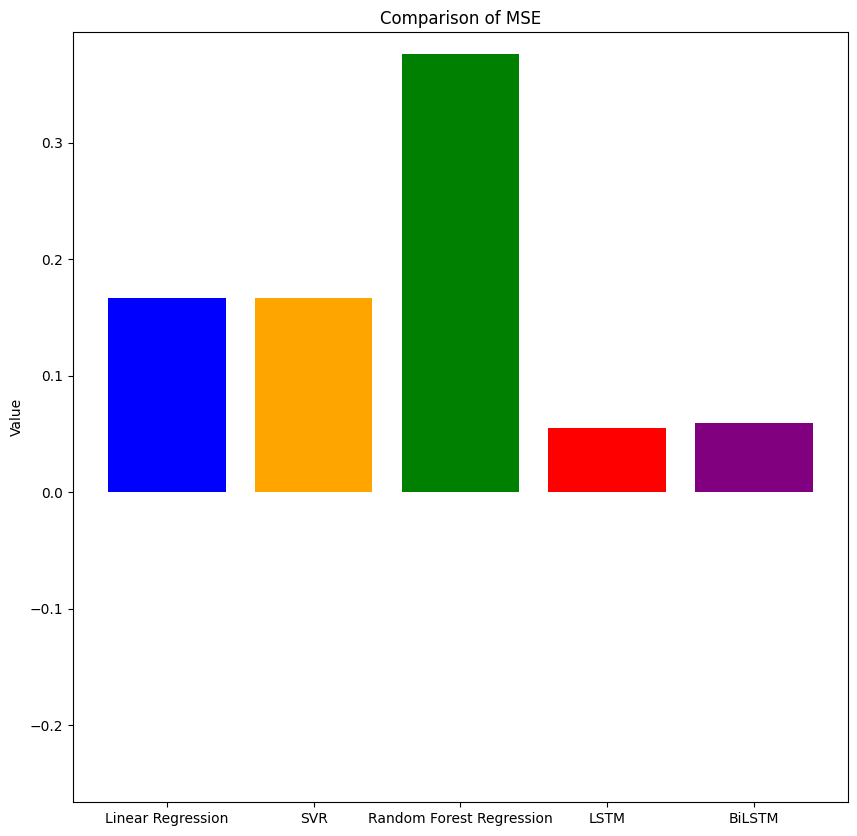

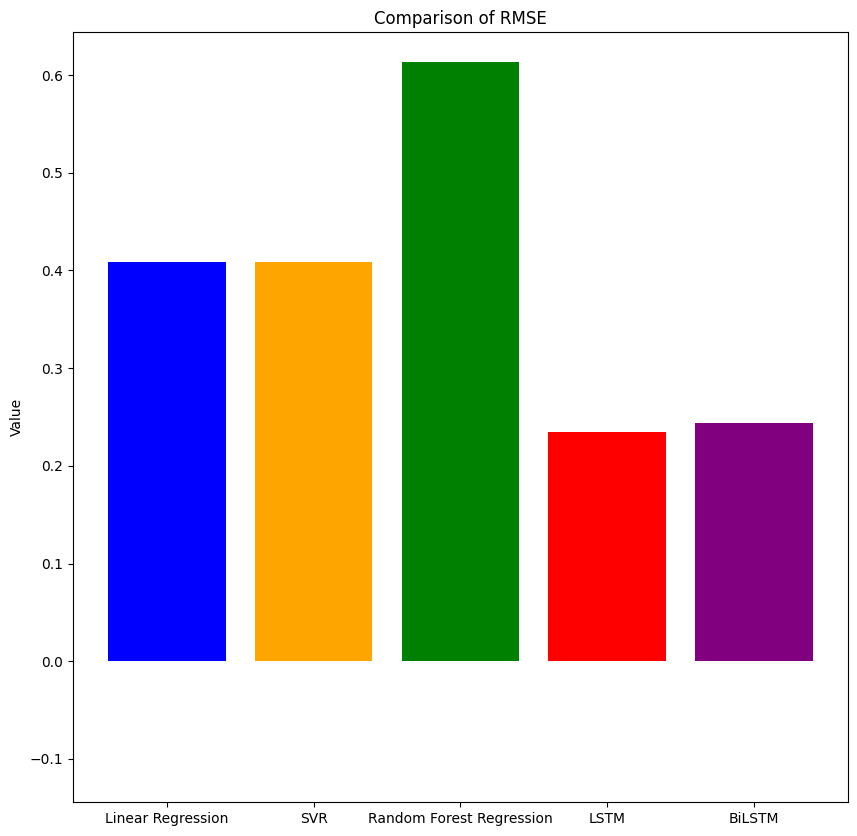

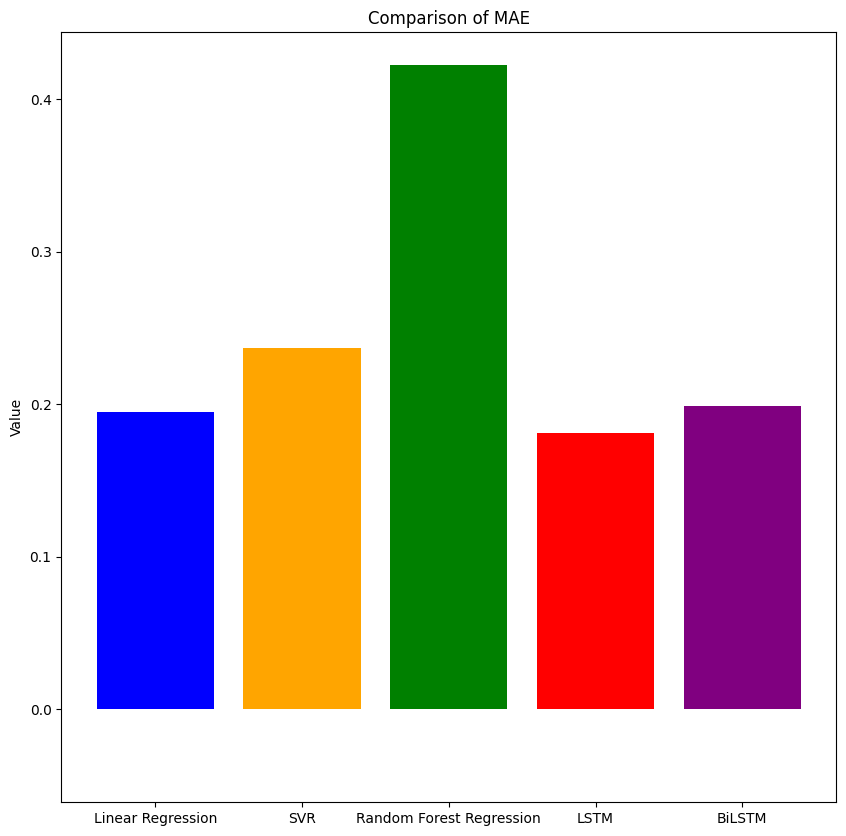

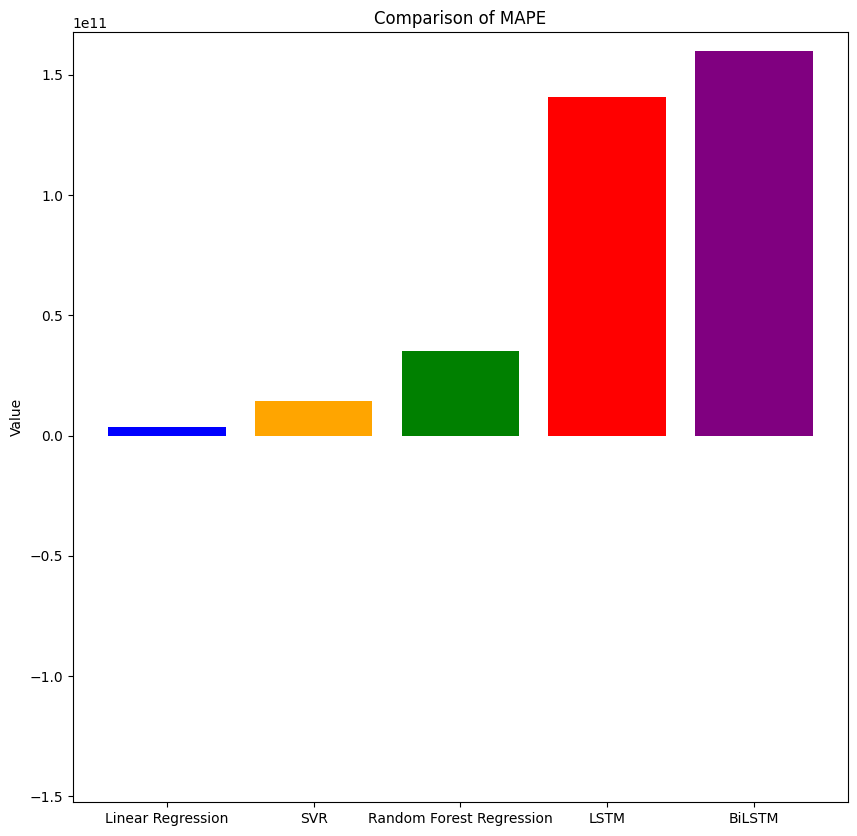

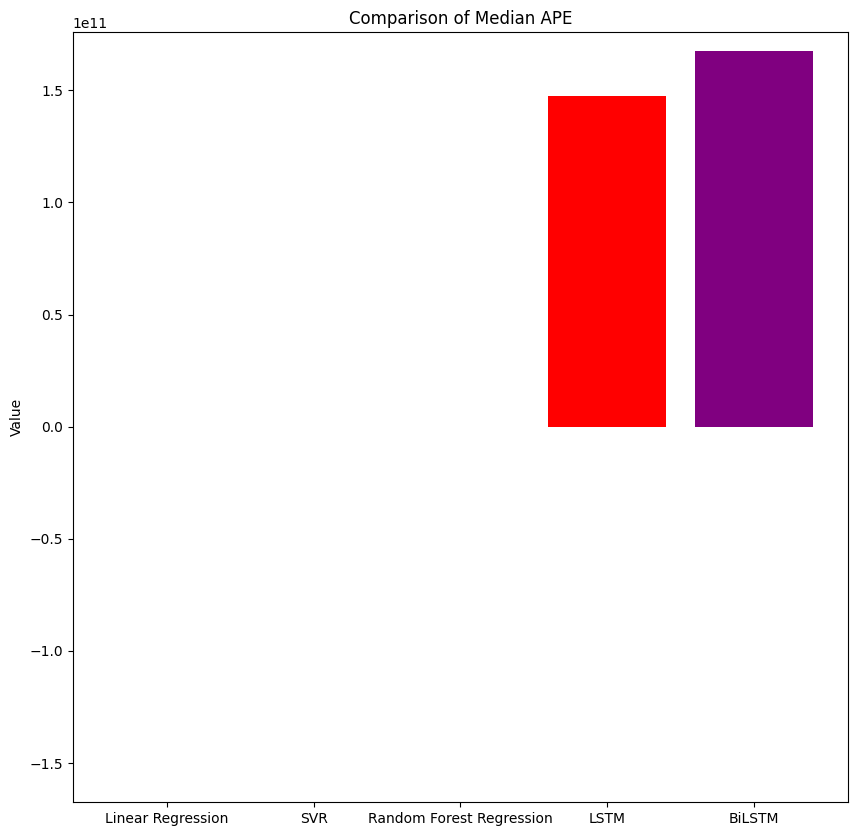

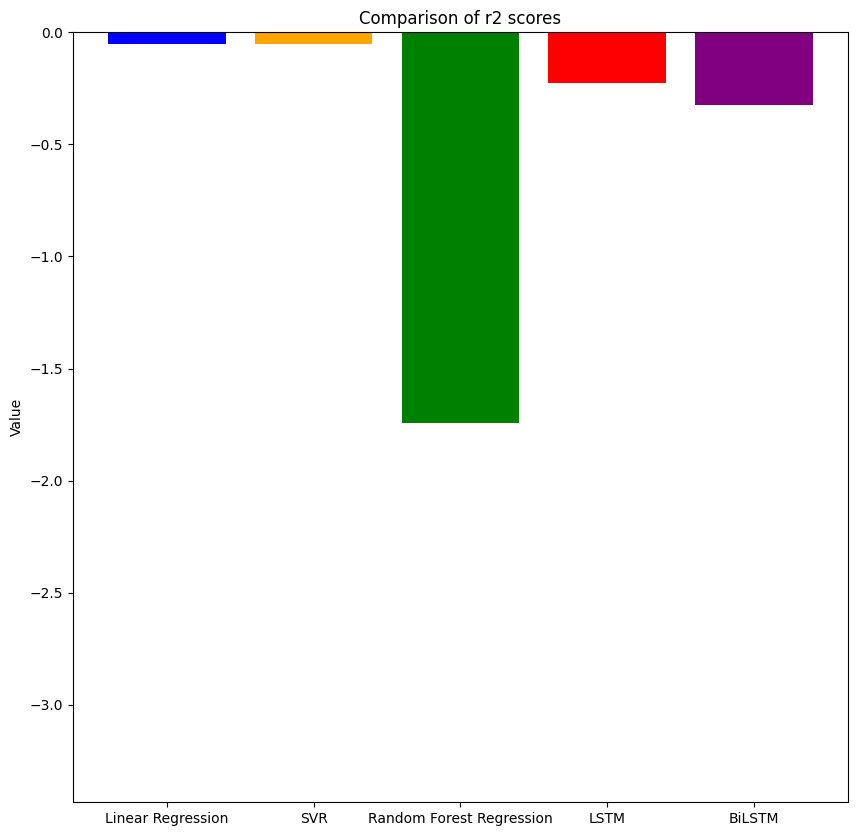

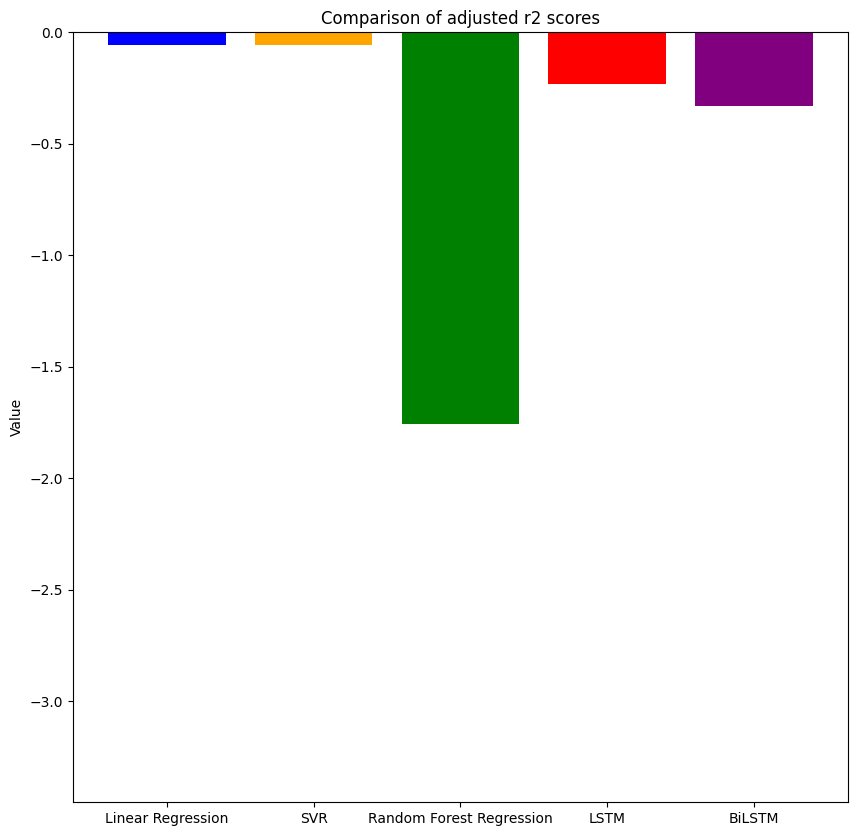

In [ ]:
import matplotlib.pyplot as plt

# Define the models and their corresponding MSE, RMSE, and MAE
models = ['Linear Regression', 'SVR', 'Random Forest Regression', 'LSTM', 'BiLSTM']
mse_values = [mse_linear_regression, mse_SVR, mse_RFR, mse_LSTM, mse_biLSTM]
rmse_values = [rmse_linear_regression, rmse_SVR, rmse_RFR, rmse_LSTM, rmse_biLSTM]
mae_values = [mae_linear_regression, mae_SVR, mae_RFR, mae_LSTM, mae_biLSTM]
mape_values = [mape_linear_regression, mape_SVR, mape_RFR, mape_LSTM, mape_biLSTM]
median_ape_values = [median_ape_linear_regression, median_ape_SVR, median_ape_RFR, median_ape_LSTM, median_ape_biLSTM]
r2_values = [r2_linear_regression, r2_SVR, r2_RFR, r2_LSTM, r2_biLSTM]
adjusted_r2_values = [adjusted_r2_linear_regression, adjusted_r2_SVR, adjusted_r2_RFR, adjusted_r2_LSTM, adjusted_r2_biLSTM]

# Create a function to plot the bar graphs
def plot_graph(models, values, title):
    plt.figure(figsize=(10, 10))
    plt.bar(models, values, color=['blue', 'orange', 'green', 'red', 'purple'])
    plt.title(title)
    plt.ylabel('Value')
    min_val = min(values)
    max_val = max(values)
    plt.ylim(min_val - 1 * (max_val - min_val))
    plt.show()

# Plot the MSE, RMSE, and MAE bar graphs
plot_graph(models, mse_values, 'Comparison of MSE')
plot_graph(models, rmse_values, 'Comparison of RMSE')
plot_graph(models, mae_values, 'Comparison of MAE')
plot_graph(models, mape_values, 'Comparison of MAPE')
plot_graph(models, median_ape_values, 'Comparison of Median APE')
plot_graph(models, r2_values, 'Comparison of r2 scores')
plot_graph(models, adjusted_r2_values, 'Comparison of adjusted r2 scores')

# **USING ONLY FUNDAMENTAL DATA**

## Dropping Columns

In [ ]:
import pandas as pd
final_fundamental_data = final_data
# Dropping price column
final_fundamental_data = final_fundamental_data.drop(columns=["Volume","Return","Close_Price","Open_Price"])

## Train test split

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Sort the data by the "Year" column in descending order ("Year" is the column indicating time)
final_fundamental_data_sorted = final_fundamental_data.sort_values(by="Year", ascending=False)

# Calculate the index where 20% of the data lies
test_index = int(0.2 * len(final_fundamental_data_sorted))

# Split the data into training and testing sets
X_train = final_fundamental_data_sorted.iloc[test_index:]  # Use data from the test_index onwards for training
X_test = final_fundamental_data_sorted.iloc[:test_index]  # Use data up to the test_index for testing

# Separate the target variable
y_train = X_train["Next Year's Return"]
y_test = X_test["Next Year's Return"]

# Drop the target variable from the feature sets
X_train = X_train.drop(columns=["Next Year's Return"])
X_test = X_test.drop(columns=["Next Year's Return"])

## Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train.iloc[:, 1:7] = scaler.fit_transform(X_train.iloc[:, 1:7])
X_test.iloc[:, 1:7] = scaler.transform(X_test.iloc[:, 1:7])

print(X_train)
print(X_test)
print(y_train)
print(y_test)

      Year       Eps        PE  Asst/Shr    Profit    Divid%  Div.Yield  \
1593  2019 -0.331182 -0.117976 -0.254861 -0.234996 -0.267706   0.429537   
1782  2019 -0.330333 -0.132113 -0.253242 -0.111944 -0.267706   1.044476   
1262  2019 -0.466140 -0.304387 -0.336265 -0.493753 -0.310740  -0.706356   
4435  2019 -0.212352 -0.207587 -0.173456  0.766047 -0.239016   0.265732   
4397  2019 -0.098614 -0.036990  0.084468 -0.014225 -0.239016  -0.470047   
...    ...       ...       ...       ...       ...       ...        ...   
2029  2000  0.476866 -0.215015  0.748274 -0.257243  0.263055   0.759832   
2090  2000  0.161965 -0.222203 -0.029498 -0.257305  0.191331   1.530520   
816   2000  0.144989 -0.194769  0.031151  0.045019  0.980299   2.618076   
437   2000  0.716225 -0.261498 -0.109380 -0.282535 -0.310740   1.079385   
1437  2000  0.175546 -0.255628 -0.213349 -0.163511  0.047882   0.912895   

      Sector_Bank  Sector_Cement  Sector_Engineering  ...  \
1593        False          False      

## Correlation

                                      Year       Eps        PE  Asst/Shr  \
Year                              1.000000 -0.076287  0.076236 -0.022042   
Eps                              -0.076287  1.000000 -0.016024  0.502447   
PE                                0.076236 -0.016024  1.000000  0.038449   
Asst/Shr                         -0.022042  0.502447  0.038449  1.000000   
Profit                            0.075255  0.245330 -0.026981  0.065241   
Divid%                            0.015863  0.067184 -0.005114  0.025915   
Div.Yield                        -0.081441  0.109359 -0.069440  0.033941   
Volume                            0.289730 -0.065387 -0.016314 -0.054010   
Open_Price                       -0.247137  0.367025  0.003506  0.253773   
Close_Price                      -0.259076  0.377846  0.001834  0.228405   
Return                           -0.056215  0.004315  0.020115 -0.016927   
Next Year's Return               -0.075601 -0.048260 -0.000065 -0.035142   
Sector_Bank 

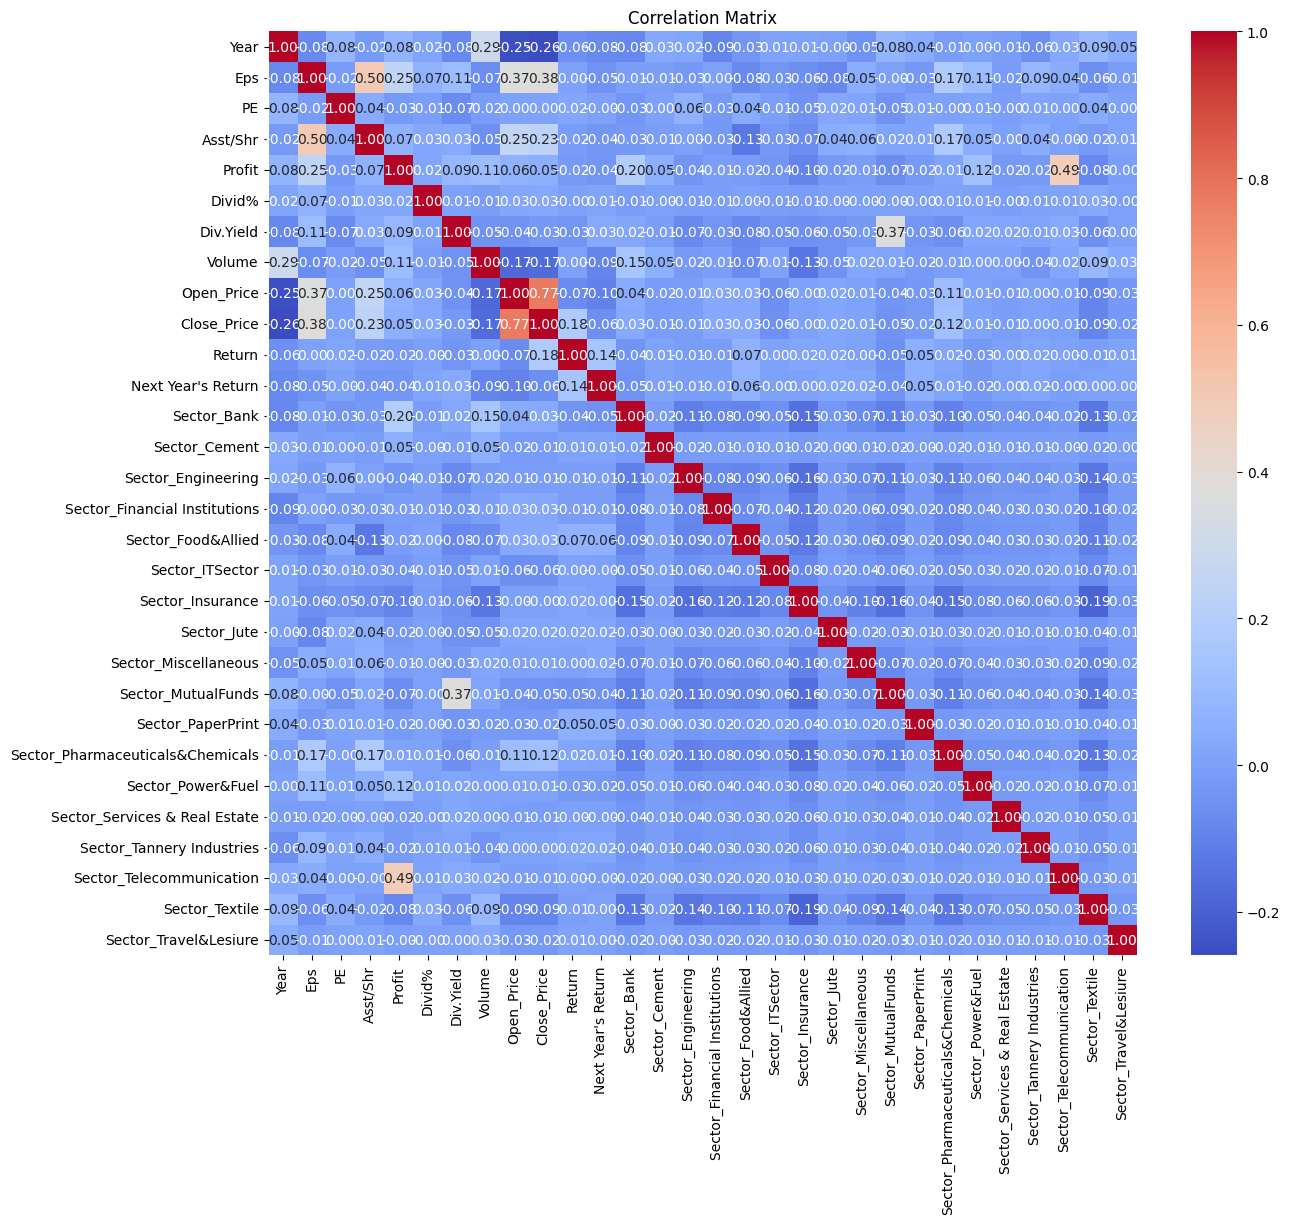

In [ ]:
import pandas as pd

correlation_matrix = final_data.corr()
print(correlation_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# import pandas as pd

# correlation_matrix = yearly_price_data.corr()
# print(correlation_matrix)

# import seaborn as sns
# import matplotlib.pyplot as plt

# # Plot the correlation matrix as a heatmap
# plt.figure(figsize=(14, 12))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Matrix')
# plt.show()

## Training Models

### Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import numpy as np

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the training set
y_pred_train = model.predict(X_train)

# Calculate MSE_linear_regression
mse_linear_regression = mean_squared_error(y_train, y_pred_train)
print("Train MSE_linear_regression:", mse_linear_regression)

# Calculate RMSE_linear_regression
rmse_linear_regression = sqrt(mse_linear_regression)
print("Train RMSE_linear_regression:", rmse_linear_regression)

# Calculate MAE_linear_regression
mae_linear_regression = mean_absolute_error(y_train, y_pred_train)
print("Train MAE_linear_regression:", mae_linear_regression)

# Calculate MAPE_linear_regression
epsilon = 1e-10  # a small constant that we add to avoid division by zero
mape_linear_regression = np.mean(np.abs((y_train - y_pred_train) / (y_train + epsilon))) * 100
print("Train MAPE_linear_regression:", mape_linear_regression)

# Calculate Median APE_linear_regression
median_ape_train_linear_regression = np.median(np.abs((y_train - y_pred_train) / (y_train + epsilon))) * 100
print("Train Median APE_linear_regression:", median_ape_train_linear_regression)

# Calculate R-squared_linear_regression
r2_linear_regression = r2_score(y_train, y_pred_train)
print("Train R-squared_linear_regression:", r2_linear_regression)

# Calculate Adjusted R-squared_linear_regression
n = X_train.shape[0]  # number of observations
p = X_train.shape[1]  # number of predictors
adjusted_r2_linear_regression = 1 - (1 - r2_linear_regression) * ((n - 1) / (n - p - 1))
print("Train Adjusted R-squared_linear_regression:", adjusted_r2_linear_regression)

print()

# Make predictions on the testing set
y_pred_test = model.predict(X_test)

# Calculate MSE_linear_regression
mse_linear_regression = mean_squared_error(y_test, y_pred_test)
print("Test MSE_linear_regression:", mse_linear_regression)

# Calculate RMSE_linear_regression
rmse_linear_regression = sqrt(mse_linear_regression)
print("Test RMSE_linear_regression:", rmse_linear_regression)

# Calculate MAE_linear_regression
mae_linear_regression = mean_absolute_error(y_test, y_pred_test)
print("Test MAE_linear_regression:", mae_linear_regression)

# Calculate MAPE_linear_regression
epsilon = 1e-10  # a small constant that we add to y_test to avoid division by zero
mape_linear_regression = np.mean(np.abs((y_test - y_pred_test) / (y_test + epsilon))) * 100
print("Test MAPE_linear_regression:", mape_linear_regression)

# Calculate Median APE_linear_regression
median_ape_linear_regression = np.median(np.abs((y_test - y_pred_test) / (y_test + epsilon))) * 100
print("Test Median APE_linear_regression:", median_ape_linear_regression)

# Calculate R-squared_linear_regression
r2_linear_regression = r2_score(y_test, y_pred_test)
print("Test R-squared_linear_regression:", r2_linear_regression)

# Calculate Adjusted R-squared_linear_regression
n = X_test.shape[0]  # number of observations
p = X_test.shape[1]  # number of predictors
adjusted_r2_linear_regression = 1 - (1 - r2_linear_regression) * ((n - 1) / (n - p - 1))
print("Test Adjusted R-squared_linear_regression:", adjusted_r2_linear_regression)

Train MSE_linear_regression: 0.4913413821429656
Train RMSE_linear_regression: 0.7009574752743318
Train MAE_linear_regression: 0.4144736816784228
Train MAPE_linear_regression: 442585674.6577294
Train Median APE_linear_regression: 102.54246496830883
Train R-squared_linear_regression: 0.03597336847259147
Train Adjusted R-squared_linear_regression: 0.02950165370669866

Test MSE_linear_regression: 1.5069557008990284
Test RMSE_linear_regression: 1.2275812400403603
Test MAE_linear_regression: 0.3457210985787702
Test MAPE_linear_regression: 9838743306.762094
Test Median APE_linear_regression: 117.48601783580943
Test R-squared_linear_regression: -4.2942371656084095
Test Adjusted R-squared_linear_regression: -4.439523586179441


### SVR

In [ ]:
from sklearn.svm import SVR

# Train a SVR model
model = SVR(kernel='rbf')
model.fit(X_train, y_train.ravel())

# Make predictions on the training set
y_pred_train = model.predict(X_train)

# Calculate MSE
mse_SVR = mean_squared_error(y_train, y_pred_train)
print("train MSE_SVR:", mse_SVR)

# Calculate RMSE_SVR
rmse_SVR = sqrt(mse_SVR)
print("train RMSE_SVR:", rmse_SVR)

# Calculate MAE_SVR
mae_SVR = mean_absolute_error(y_train, y_pred_train)
print("train MAE_SVR:", mae_SVR)

# Calculate MAPE_SVR
epsilon = 1e-10  # a small constant that we add to avoid division by zero
mape_SVR = np.mean(np.abs((y_train - y_pred_train) / (y_train + epsilon))) * 100
print("Train MAPE_SVR:", mape_SVR)

# Calculate Median APE_SVR
median_ape_train_SVR = np.median(np.abs((y_train - y_pred_train) / (y_train + epsilon))) * 100
print("Train Median APE_SVR:", median_ape_train_SVR)

# Calculate R-squared_SVR
r2_SVR = r2_score(y_train, y_pred_train)
print("Train R-squared_SVR:", r2_SVR)

# Calculate Adjusted R-squared_SVR
n = X_train.shape[0]  # number of observations
p = X_train.shape[1]  # number of predictors
adjusted_r2_SVR = 1 - (1 - r2_SVR) * ((n - 1) / (n - p - 1))
print("Train Adjusted R-squared_SVR:", adjusted_r2_SVR)

print()

# Make predictions on the testing set
y_pred_test = model.predict(X_test)

# Calculate MSE
mse_SVR = mean_squared_error(y_test, y_pred_test)
print("Test MSE:", mse_SVR)

# Calculate RMSE_SVR
rmse_SVR = sqrt(mse_SVR)
print("Test RMSE_SVR:", rmse_SVR)

# Calculate MAE_SVR
mae_SVR = mean_absolute_error(y_test, y_pred_test)
print("Test MAE_SVR:", mae_SVR)

# Calculate MAPE_SVR
epsilon = 1e-10  # a small constant that we add to y_test to avoid division by zero
mape_SVR = np.mean(np.abs((y_test - y_pred_test) / (y_test + epsilon))) * 100
print("Test MAPE_SVR:", mape_SVR)

# Calculate Median APE_SVR
median_ape_SVR = np.median(np.abs((y_test - y_pred_test) / (y_test + epsilon))) * 100
print("Test Median APE_SVR:", median_ape_SVR)

# Calculate R-squared_SVR
r2_SVR = r2_score(y_test, y_pred_test)
print("Test R-squared_SVR:", r2_SVR)

# Calculate Adjusted R-squared_SVR
n = X_test.shape[0]  # number of observations
p = X_test.shape[1]  # number of predictors
adjusted_r2_SVR = 1 - (1 - r2_SVR) * ((n - 1) / (n - p - 1))
print("Test Adjusted R-squared_SVR:", adjusted_r2_SVR)

<ipython-input-62-34dd94df89a9>:5: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  model.fit(X_train, y_train.ravel())


train MSE_SVR: 0.5246514848329403
train RMSE_SVR: 0.7243282990695175
train MAE_SVR: 0.4025045269923108
Train MAPE_SVR: 251569094.91121188
Train Median APE_SVR: 95.80720587495202
Train R-squared_SVR: -0.029382059055197862
Train Adjusted R-squared_SVR: -0.03629251863532135

Test MSE: 0.31952084782436463
Test RMSE_SVR: 0.56526175160218
Test MAE_SVR: 0.2865890382636883
Test MAPE_SVR: 4510490413.552746
Test Median APE_SVR: 109.13395400550627
Test R-squared_SVR: -0.12254072679725359
Test Adjusted R-squared_SVR: -0.15334590590804553


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Define the SVR model
model = SVR()

# Define the hyperparameters to tune
param_grid = {
    'kernel': ['rbf'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], # Regularization parameter
    'epsilon': [0.001, 0.01, 0.05, 0.1, 0.2, 0.5, 0.8, 1, 1.5], # Margin of tolerance
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train.ravel())

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Instantiate SVR with best hyperparameters
best_model = SVR(**best_params)

# Train the model with best hyperparameters
best_model.fit(X_train, y_train.ravel())

Fitting 5 folds for each of 63 candidates, totalling 315 fits


<ipython-input-63-6390c9df7a4e>:16: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  grid_search.fit(X_train, y_train.ravel())


[CV] END .................C=0.001, epsilon=0.001, kernel=rbf; total time=   0.5s
[CV] END .................C=0.001, epsilon=0.001, kernel=rbf; total time=   0.5s
[CV] END .................C=0.001, epsilon=0.001, kernel=rbf; total time=   0.5s
[CV] END .................C=0.001, epsilon=0.001, kernel=rbf; total time=   0.5s
[CV] END .................C=0.001, epsilon=0.001, kernel=rbf; total time=   0.5s
[CV] END ..................C=0.001, epsilon=0.01, kernel=rbf; total time=   0.5s
[CV] END ..................C=0.001, epsilon=0.01, kernel=rbf; total time=   0.5s
[CV] END ..................C=0.001, epsilon=0.01, kernel=rbf; total time=   0.5s
[CV] END ..................C=0.001, epsilon=0.01, kernel=rbf; total time=   0.5s
[CV] END ..................C=0.001, epsilon=0.01, kernel=rbf; total time=   0.5s
[CV] END ..................C=0.001, epsilon=0.05, kernel=rbf; total time=   0.4s
[CV] END ..................C=0.001, epsilon=0.05, kernel=rbf; total time=   0.4s
[CV] END ..................C

<ipython-input-63-6390c9df7a4e>:26: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  best_model.fit(X_train, y_train.ravel())


SVR(C=0.001, epsilon=0.5)

In [ ]:
# Make predictions on the training set
y_pred_train = best_model.predict(X_train)

# Calculate MSE
mse_SVR = mean_squared_error(y_train, y_pred_train)
print("train MSE_SVR:", mse_SVR)

# Calculate RMSE_SVR
rmse_SVR = sqrt(mse_SVR)
print("train RMSE_SVR:", rmse_SVR)

# Calculate MAE_SVR
mae_SVR = mean_absolute_error(y_train, y_pred_train)
print("train MAE_SVR:", mae_SVR)

# Calculate MAPE_SVR
epsilon = 1e-10  # a small constant that we add to avoid division by zero
mape_SVR = np.mean(np.abs((y_train - y_pred_train) / (y_train + epsilon))) * 100
print("Train MAPE_SVR:", mape_SVR)

# Calculate Median APE_SVR
median_ape_train_SVR = np.median(np.abs((y_train - y_pred_train) / (y_train + epsilon))) * 100
print("Train Median APE_SVR:", median_ape_train_SVR)

# Calculate R-squared_SVR
r2_SVR = r2_score(y_train, y_pred_train)
print("Train R-squared_SVR:", r2_SVR)

# Calculate Adjusted R-squared_SVR
n = X_train.shape[0]  # number of observations
p = X_train.shape[1]  # number of predictors
adjusted_r2_SVR = 1 - (1 - r2_SVR) * ((n - 1) / (n - p - 1))
print("Train Adjusted R-squared_SVR:", adjusted_r2_SVR)

print()

# Make predictions on the testing set
y_pred_test = best_model.predict(X_test)

# Calculate MSE
mse_SVR = mean_squared_error(y_test, y_pred_test)
print("Test MSE:", mse_SVR)

# Calculate RMSE_SVR
rmse_SVR = sqrt(mse_SVR)
print("Test RMSE_SVR:", rmse_SVR)

# Calculate MAE_SVR
mae_SVR = mean_absolute_error(y_test, y_pred_test)
print("Test MAE_SVR:", mae_SVR)

# Calculate MAPE_SVR
epsilon = 1e-10  # a small constant that we add to y_test to avoid division by zero
mape_SVR = np.mean(np.abs((y_test - y_pred_test) / (y_test + epsilon))) * 100
print("Test MAPE_SVR:", mape_SVR)

# Calculate Median APE_SVR
median_ape_SVR = np.median(np.abs((y_test - y_pred_test) / (y_test + epsilon))) * 100
print("Test Median APE_SVR:", median_ape_SVR)

# Calculate R-squared_SVR
r2_SVR = r2_score(y_test, y_pred_test)
print("Test R-squared_SVR:", r2_SVR)

# Calculate Adjusted R-squared_SVR
n = X_test.shape[0]  # number of observations
p = X_test.shape[1]  # number of predictors
adjusted_r2_SVR = 1 - (1 - r2_SVR) * ((n - 1) / (n - p - 1))
print("Test Adjusted R-squared_SVR:", adjusted_r2_SVR)

train MSE_SVR: 0.5097900663447573
train RMSE_SVR: 0.7139958447671508
train MAE_SVR: 0.42314001113595767
Train MAPE_SVR: 587398586.9100121
Train Median APE_SVR: 120.76523261267882
Train R-squared_SVR: -0.00022350712864027678
Train Adjusted R-squared_SVR: -0.006938219179718708

Test MSE: 0.2867015976178941
Test RMSE_SVR: 0.5354452330704739
Test MAE_SVR: 0.2930432163813712
Test MAPE_SVR: 9198668548.085537
Test Median APE_SVR: 137.16395302104598
Test R-squared_SVR: -0.0072401283212404355
Test Adjusted R-squared_SVR: -0.03488118562972664


### Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest Regression model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions on the training set
y_pred_train = model.predict(X_train)

# Calculate MSE
mse_RFR = mean_squared_error(y_train, y_pred_train)
print("train MSE:", mse_RFR)

# Calculate RMSE_RFR
rmse_RFR = sqrt(mse_RFR)
print("train RMSE_RFR:", rmse_RFR)

# Calculate MAE_RFR
mae_RFR = mean_absolute_error(y_train, y_pred_train)
print("train MAE_RFR:", mae_RFR)

# Calculate MAPE_RFR
epsilon = 1e-10  # a small constant that we add to avoid division by zero
mape_RFR = np.mean(np.abs((y_train - y_pred_train) / (y_train + epsilon))) * 100
print("Train MAPE_RFR:", mape_RFR)

# Calculate Median APE_RFR
median_ape_train_RFR = np.median(np.abs((y_train - y_pred_train) / (y_train + epsilon))) * 100
print("Train Median APE_RFR:", median_ape_train_RFR)

# Calculate R-squared_RFR
r2_RFR = r2_score(y_train, y_pred_train)
print("Train R-squared_RFR:", r2_RFR)

# Calculate Adjusted R-squared_RFR
n = X_train.shape[0]  # number of observations
p = X_train.shape[1]  # number of predictors
adjusted_r2_RFR = 1 - (1 - r2_RFR) * ((n - 1) / (n - p - 1))
print("Train Adjusted R-squared_RFR:", adjusted_r2_RFR)

print()

# Make predictions on the testing set
y_pred_test = model.predict(X_test)

# Calculate MSE
mse_RFR = mean_squared_error(y_test, y_pred_test)
print("Test MSE_RFR:", mse_RFR)

# Calculate RMSE_RFR
rmse_RFR = sqrt(mse_RFR)
print("Test RMSE_RFR:", rmse_RFR)

# Calculate MAE_RFR
mae_RFR = mean_absolute_error(y_test, y_pred_test)
print("Test MAE_RFR:", mae_RFR)

# Calculate MAPE_RFR
epsilon = 1e-10  # a small constant that we add to y_test to avoid division by zero
mape_RFR = np.mean(np.abs((y_test - y_pred_test) / (y_test + epsilon))) * 100
print("Test MAPE_RFR:", mape_RFR)

# Calculate Median APE_RFR
median_ape_RFR = np.median(np.abs((y_test - y_pred_test) / (y_test + epsilon))) * 100
print("Test Median APE_RFR:", median_ape_RFR)

# Calculate R-squared_RFR
r2_RFR = r2_score(y_test, y_pred_test)
print("Test R-squared_RFR:", r2_RFR)

# Calculate Adjusted R-squared_RFR
n = X_test.shape[0]  # number of observations
p = X_test.shape[1]  # number of predictors
adjusted_r2_RFR = 1 - (1 - r2_RFR) * ((n - 1) / (n - p - 1))
print("Test Adjusted R-squared_RFR:", adjusted_r2_RFR)

train MSE: 0.052335322421770254
train RMSE_RFR: 0.22876914656869762
train MAE_RFR: 0.12173013897892694
Train MAPE_RFR: 543755536.5780964
Train Median APE_RFR: 26.49964148944829
Train R-squared_RFR: 0.8973165167482681
Train Adjusted R-squared_RFR: 0.8966271807973301

Test MSE_RFR: 0.430978428505021
Test RMSE_RFR: 0.6564894732629161
Test MAE_RFR: 0.46278139836781984
Test MAPE_RFR: 35609692773.37603
Test Median APE_RFR: 230.89661521850692
Test R-squared_RFR: -0.5141135286230099
Test Adjusted R-squared_RFR: -0.5556643938431802


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10],  # Maximum depth of the tree
    'min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2],  # Minimum number of samples required to be at a leaf node
}

# Instantiate the Random Forest Regression model
rf_model = RandomForestRegressor()

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train a Random Forest Regression model with the best parameters
best_rf_model = RandomForestRegressor(**best_params)
best_rf_model.fit(X_train, y_train)

# Make predictions on the training set
y_pred_train = best_rf_model.predict(X_train)

# Calculate MSE
mse_RFR = mean_squared_error(y_train, y_pred_train)
print("Train MSE:", mse_RFR)

# Calculate RMSE
rmse_RFR = sqrt(mse_RFR)
print("Train RMSE:", rmse_RFR)

# Calculate MAE
mae_RFR = mean_absolute_error(y_train, y_pred_train)
print("Train MAE:", mae_RFR)

print()

# Make predictions on the testing set
y_pred_test = best_rf_model.predict(X_test)

# Calculate MSE
mse_RFR = mean_squared_error(y_test, y_pred_test)
print("Test MSE:", mse_RFR)

# Calculate RMSE
rmse_RFR = sqrt(mse_RFR)
print("Test RMSE:", rmse_RFR)

# Calculate MAE
mae_RFR = mean_absolute_error(y_test, y_pred_test)
print("Test MAE:", mae_RFR)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}
Train MSE: 0.17886541564991226
Train RMSE: 0.42292483451543994
Train MAE: 0.2368525393226786

Test MSE: 0.38232556939782225
Test RMSE: 0.6183248089781149
Test MAE: 0.43647212472005764


### LSTM

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3750, 25)
(937, 25)
(3750,)
(937,)


In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

# Define time steps and calculate features per timestep
timesteps = 1
features_per_timestep = X_train.shape[1] // timesteps

# Convert DataFrames to NumPy arrays and reshape
X_train = X_train.to_numpy() if isinstance(X_train, pd.DataFrame) else X_train
X_test = X_test.to_numpy() if isinstance(X_test, pd.DataFrame) else X_test

# Reshape data for LSTM (samples, timesteps, features)
X_train_reshaped = X_train.reshape(X_train.shape[0], timesteps, features_per_timestep)
X_test_reshaped = X_test.reshape(X_test.shape[0], timesteps, features_per_timestep)

# Convert features to float32
X_train_reshaped = X_train_reshaped.astype(np.float32)
X_test_reshaped = X_test_reshaped.astype(np.float32)

# Convert labels to binary and float32 for compatibility with TensorFlow
y_train = (y_train > 0.5).astype(np.float32)  # Ensure binary values 0.0 or 1.0
y_test = (y_test > 0.5).astype(np.float32)

# Initialize the RNN model
model = Sequential()

# Add input and LSTM layers
model.add(Input(shape=(timesteps, features_per_timestep)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Train the model
model.fit(X_train_reshaped, y_train, epochs=20, batch_size=32)

# Evaluate and make predictions
y_pred_train = model.predict(X_train_reshaped).flatten()
y_pred_test = model.predict(X_test_reshaped).flatten()

# Evaluation metrics for training set
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
epsilon = 1e-10  # Small constant to avoid division by zero
mape_train = np.mean(np.abs((y_train - y_pred_train) / (y_train + epsilon))) * 100
median_ape_train = np.median(np.abs((y_train - y_pred_train) / (y_train + epsilon))) * 100
r2_train = r2_score(y_train, y_pred_train)
n_train = X_train.shape[0]
p_train = X_train.shape[1]
adjusted_r2_train = 1 - (1 - r2_train) * ((n_train - 1) / (n_train - p_train - 1))

# Print training metrics
print("Train MSE:", mse_train)
print("Train RMSE:", rmse_train)
print("Train MAE:", mae_train)
print("Train MAPE:", mape_train)
print("Train Median APE:", median_ape_train)
print("Train R-squared:", r2_train)
print("Train Adjusted R-squared:", adjusted_r2_train)

# Evaluation metrics for test set
mse_LSTM = mean_squared_error(y_test, y_pred_test)
rmse_LSTM = sqrt(mse_LSTM)
mae_LSTM = mean_absolute_error(y_test, y_pred_test)
mape_LSTM = np.mean(np.abs((y_test - y_pred_test) / (y_test + epsilon))) * 100
median_ape_LSTM = np.median(np.abs((y_test - y_pred_test) / (y_test + epsilon))) * 100
r2_LSTM = r2_score(y_test, y_pred_test)
n_test = X_test.shape[0]
p_test = X_test.shape[1]
adjusted_r2_LSTM = 1 - (1 - r2_LSTM) * ((n_test - 1) / (n_test - p_test - 1))

# Print test metrics
print("Test MSE:", mse_LSTM)
print("Test RMSE:", rmse_LSTM)
print("Test MAE:", mae_LSTM)
print("Test MAPE:", mape_LSTM)
print("Test Median APE:", median_ape_LSTM)
print("Test R-squared:", r2_LSTM)
print("Test Adjusted R-squared:", adjusted_r2_LSTM)

Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8568 - loss: 0.5590
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8488 - loss: 0.4263
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8495 - loss: 0.4273
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8521 - loss: 0.4208
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8523 - loss: 0.4195
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8496 - loss: 0.4244
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8608 - loss: 0.4068
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8528 - loss: 0.4200
Epoch 9/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8528 - loss: 0.4185
Epoch 10/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8471 - loss: 0.4290
Epoch 11/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8566 - loss: 0.4127
Epoch 12/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

### BiLSTM

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional, Input
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from math import sqrt

# Ensure data is in correct numeric format
X_train_reshaped = np.array(X_train, dtype=np.float32).reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = np.array(X_test, dtype=np.float32).reshape((X_test.shape[0], 1, X_test.shape[1]))
y_train = np.array(y_train, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

# Initialize the BiLSTM model
model = Sequential()

# Adding the input layer and the BiLSTM layers
model.add(Input(shape=(1, X_train.shape[1])))  # Explicit input definition
model.add(Bidirectional(LSTM(units=50, return_sequences=True)))
model.add(Bidirectional(LSTM(units=50, return_sequences=True)))
model.add(Bidirectional(LSTM(units=50)))
model.add(Dense(units=1))  # Output layer

# Compile the RNN
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the RNN to the Training set
model.fit(X_train_reshaped, y_train, epochs=20, batch_size=32)

# Making predictions
y_pred_train = model.predict(X_train_reshaped).flatten()
y_pred_test = model.predict(X_test_reshaped).flatten()

# Evaluate testing performance
mse_biLSTM = mean_squared_error(y_test, y_pred_test)
print('Test MSE_biLSTM:', mse_biLSTM)

rmse_biLSTM = sqrt(mse_biLSTM)
print('Test RMSE_biLSTM:', rmse_biLSTM)

mae_biLSTM = mean_absolute_error(y_test, y_pred_test)
print('Test MAE_biLSTM:', mae_biLSTM)

epsilon = 1e-10  # Small constant to avoid division by zero
mape_biLSTM = np.mean(np.abs((y_test - y_pred_test) / (y_test + epsilon))) * 100
print('Test MAPE_biLSTM:', mape_biLSTM)

median_ape_biLSTM = np.median(np.abs((y_test - y_pred_test) / (y_test + epsilon))) * 100
print("Test Median APE_biLSTM:", median_ape_biLSTM)

r2_biLSTM = r2_score(y_test, y_pred_test)
print('Test R2_biLSTM:', r2_biLSTM)

n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2_biLSTM = 1 - (1 - r2_biLSTM) * (n - 1) / (n - p - 1)
print('Test Adjusted R2_biLSTM:', adjusted_r2_biLSTM)

Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.1325
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1262
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1312
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1238
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1277
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1228
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1330
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1290
Epoch 9/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1253
Epoch 10/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1277
Epoch 11/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1329
Epoch 12/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1325
Epoch 13/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1278
Epoch 14/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1266
Epoch 15/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - lo

## Model Comparison

In [ ]:
print("Linear Regression")
print('Test MSE_linear_regression:', mse_linear_regression)
print('Test RMSE_linear_regression:', rmse_linear_regression)
print('Test MAE_linear_regression:', mae_linear_regression)
print('Test MAPE_linear_regression:', mape_linear_regression)
print("Test Median APE_linear_regression:", median_ape_linear_regression)
print("Test R-squared_linear_regression:", r2_linear_regression)
print("Test Adjusted R-squared_linear_regression:", adjusted_r2_linear_regression)

print("\nSVR")
print('Test MSE_SVR:', mse_SVR)
print('Test RMSE_SVR:', rmse_SVR)
print('Test MAE_SVR:', mae_SVR)
print('Test MAPE_SVR:', mape_SVR)
print("Test Median APE_SVR:", median_ape_SVR)
print("Test R-squared_SVR:", r2_SVR)
print("Test Adjusted R-squared_SVR:", adjusted_r2_SVR)

print("\nRandom Forest Regression")
print('Test MSE_RFR:', mse_RFR)
print('Test RMSE_RFR:', rmse_RFR)
print('Test MAE_RFR:', mae_RFR)
print('Test MAPE_RFR:', mape_RFR)
print("Test Median APE_RFR:", median_ape_RFR)
print("Test R-squared_RFR:", r2_RFR)
print("Test Adjusted R-squared_RFR:", adjusted_r2_RFR)

print("\nLSTM")
print('Test MSE_LSTM:', mse_LSTM)
print('Test RMSE_LSTM:', rmse_LSTM)
print('Test MAE_LSTM:', mae_LSTM)
print('Test MAPE_LSTM:', mape_LSTM)
print("Test Median APE_LSTM:", median_ape_LSTM)
print("Test R-squared_LSTM:", r2_LSTM)
print("Test Adjusted R-squared_LSTM:", adjusted_r2_LSTM)

print("\nBiLSTM")
print('Test MSE_biLSTM:', mse_biLSTM)
print('Test RMSE_biLSTM:', rmse_biLSTM)
print('Test MAE_biLSTM:', mae_biLSTM)
print('Test MAPE_biLSTM:', mape_biLSTM)
print('Test median_ape_biLSTM:', median_ape_biLSTM)
print('Test r2_biLSTM:', r2_biLSTM)
print('Test adjusted_r2_biLSTM:', adjusted_r2_biLSTM)

Linear Regression
Test MSE_linear_regression: 1.5069557008990284
Test RMSE_linear_regression: 1.2275812400403603
Test MAE_linear_regression: 0.3457210985787702
Test MAPE_linear_regression: 9838743306.762094
Test Median APE_linear_regression: 117.48601783580943
Test R-squared_linear_regression: -4.2942371656084095
Test Adjusted R-squared_linear_regression: -4.439523586179441

SVR
Test MSE_SVR: 0.2867015976178941
Test RMSE_SVR: 0.5354452330704739
Test MAE_SVR: 0.2930432163813712
Test MAPE_SVR: 9198668548.085537
Test Median APE_SVR: 137.16395302104598
Test R-squared_SVR: -0.0072401283212404355
Test Adjusted R-squared_SVR: -0.03488118562972664

Random Forest Regression
Test MSE_RFR: 0.38232556939782225
Test RMSE_RFR: 0.6183248089781149
Test MAE_RFR: 0.43647212472005764
Test MAPE_RFR: 35609692773.37603
Test Median APE_RFR: 230.89661521850692
Test R-squared_RFR: -0.5141135286230099
Test Adjusted R-squared_RFR: -0.5556643938431802

LSTM
Test MSE_LSTM: 0.106788285
Test RMSE_LSTM: 0.32678476873

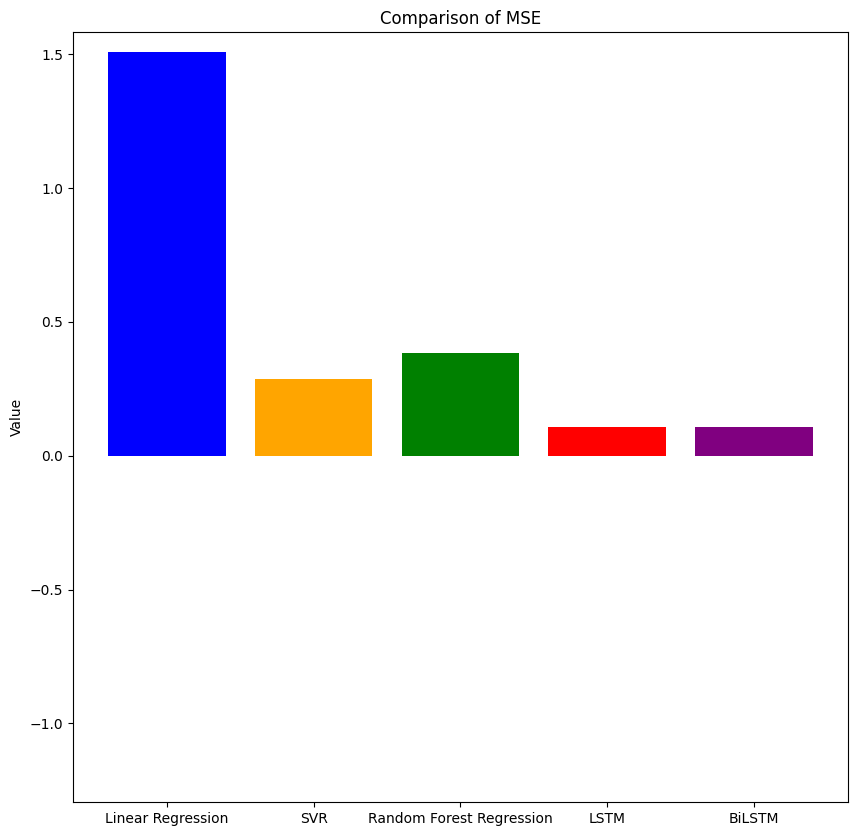

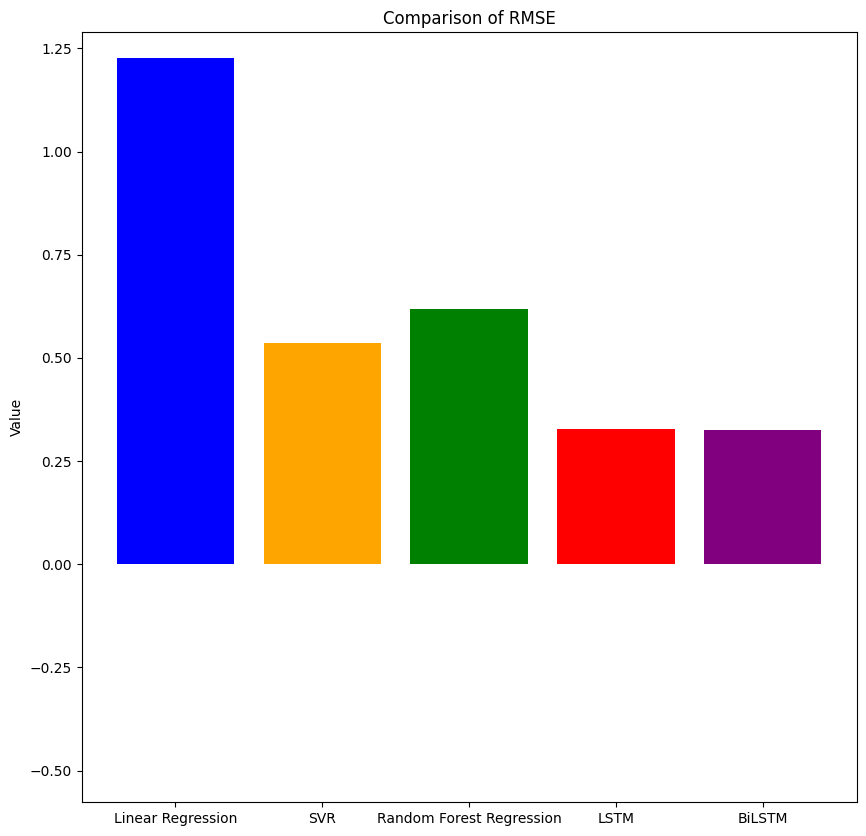

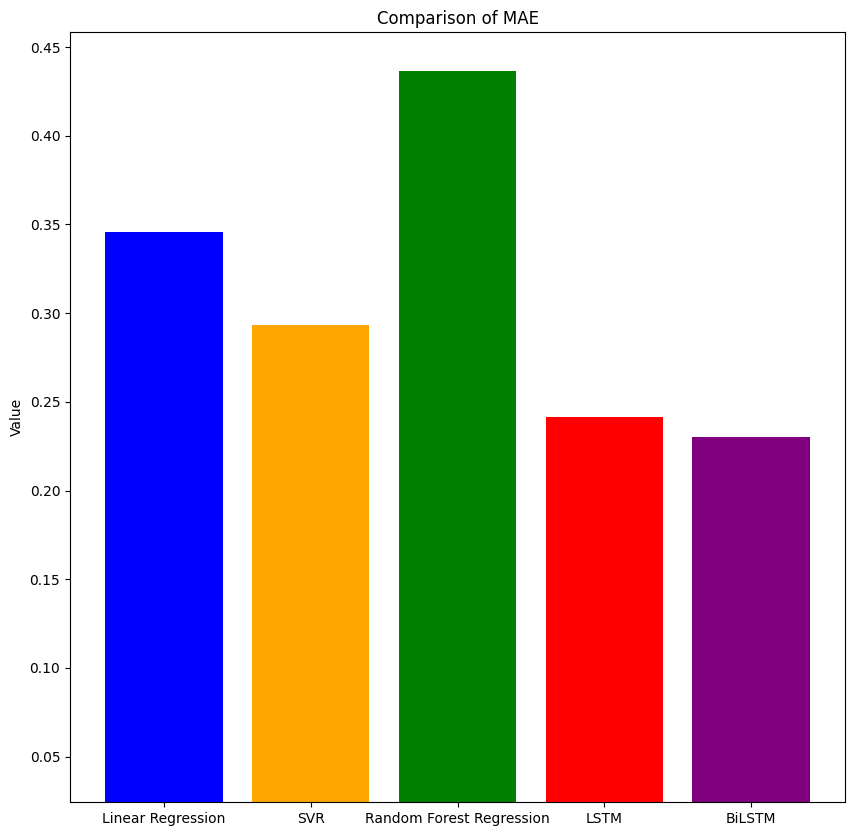

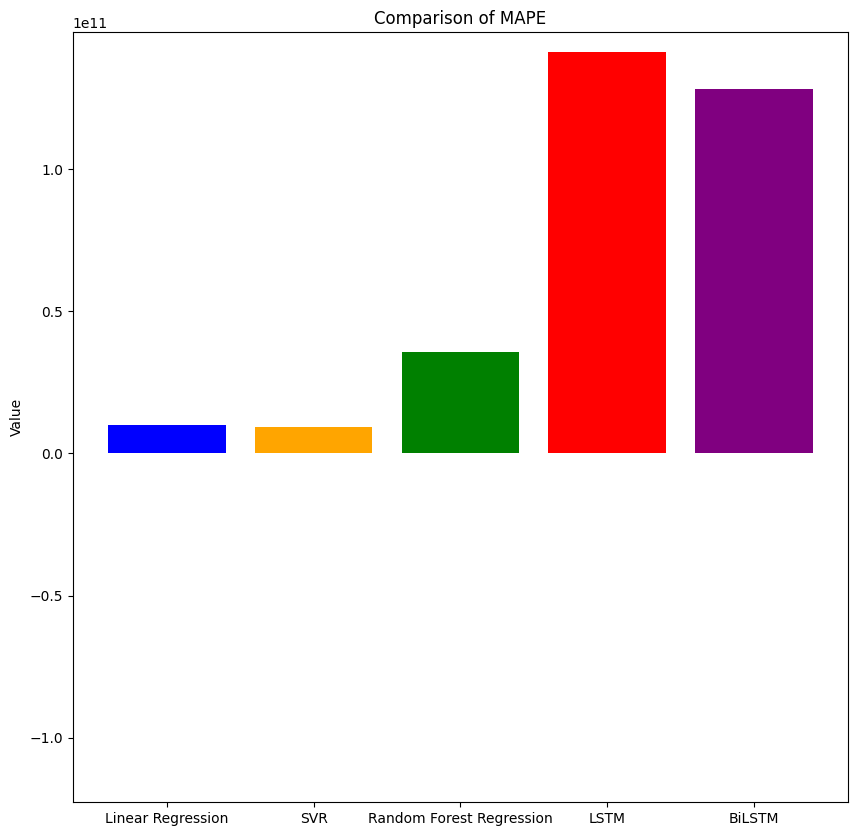

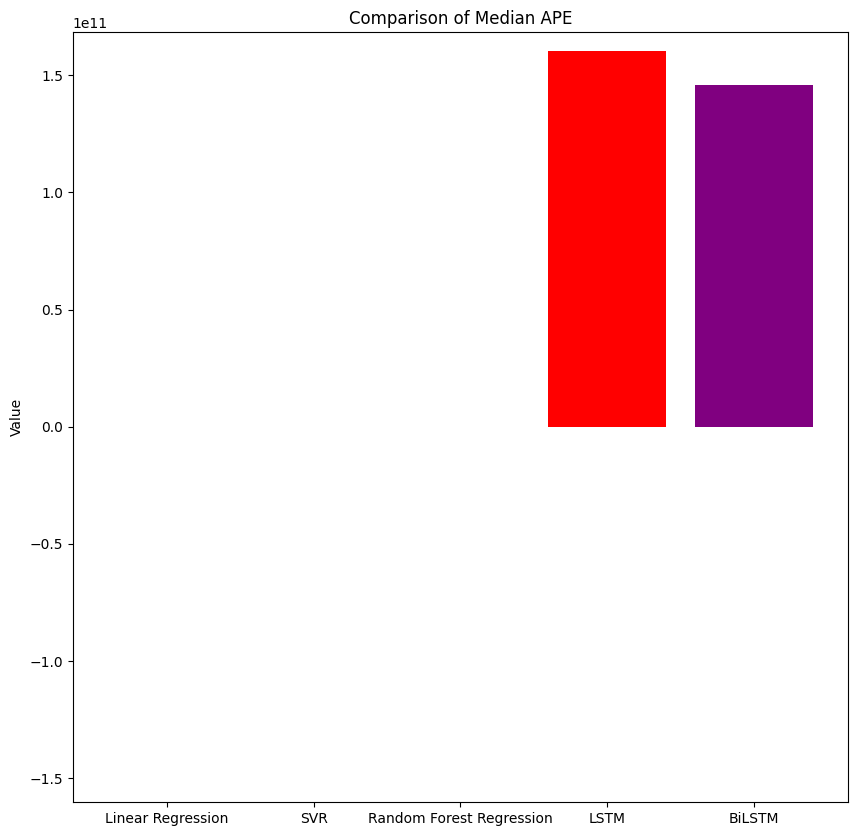

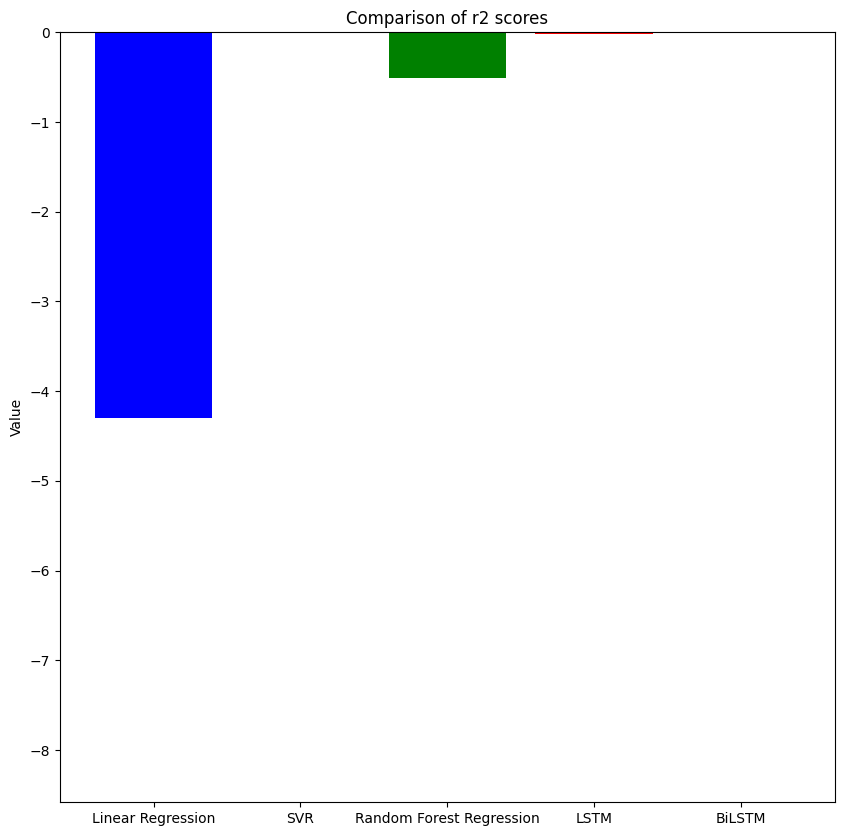

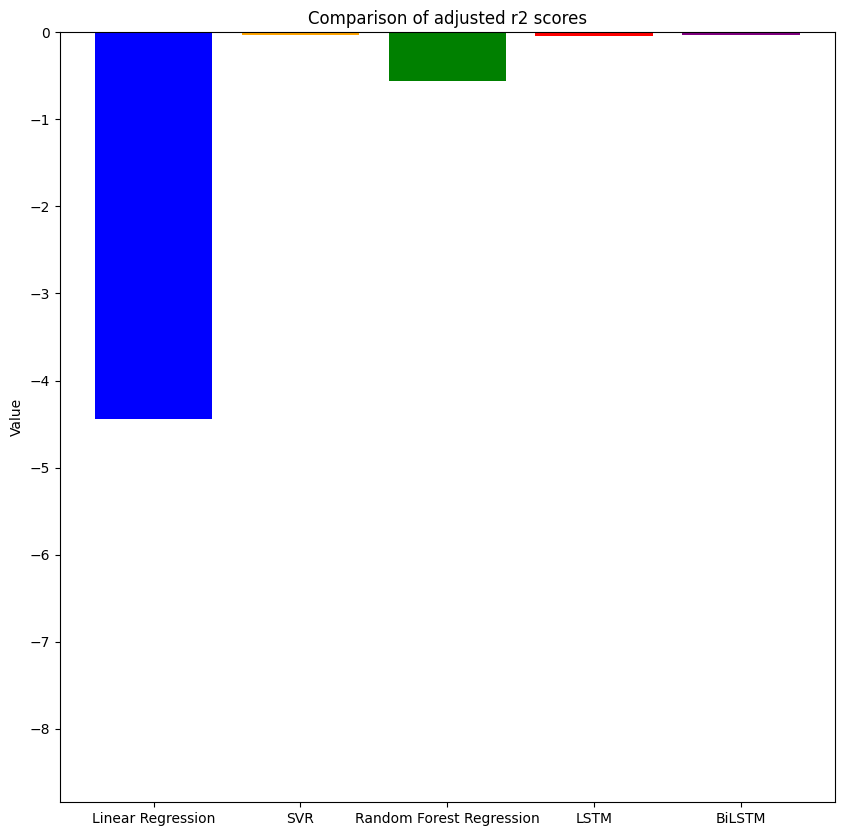

In [ ]:
import matplotlib.pyplot as plt

# Define the models and their corresponding MSE, RMSE, and MAE
models = ['Linear Regression', 'SVR', 'Random Forest Regression', 'LSTM', 'BiLSTM']
mse_values = [mse_linear_regression, mse_SVR, mse_RFR, mse_LSTM, mse_biLSTM]
rmse_values = [rmse_linear_regression, rmse_SVR, rmse_RFR, rmse_LSTM, rmse_biLSTM]
mae_values = [mae_linear_regression, mae_SVR, mae_RFR, mae_LSTM, mae_biLSTM]
mape_values = [mape_linear_regression, mape_SVR, mape_RFR, mape_LSTM, mape_biLSTM]
median_ape_values = [median_ape_linear_regression, median_ape_SVR, median_ape_RFR, median_ape_LSTM, median_ape_biLSTM]
r2_values = [r2_linear_regression, r2_SVR, r2_RFR, r2_LSTM, r2_biLSTM]
adjusted_r2_values = [adjusted_r2_linear_regression, adjusted_r2_SVR, adjusted_r2_RFR, adjusted_r2_LSTM, adjusted_r2_biLSTM]

# Create a function to plot the bar graphs
def plot_graph(models, values, title):
    plt.figure(figsize=(10, 10))
    plt.bar(models, values, color=['blue', 'orange', 'green', 'red', 'purple'])
    plt.title(title)
    plt.ylabel('Value')
    min_val = min(values)
    max_val = max(values)
    plt.ylim(min_val - 1 * (max_val - min_val))
    plt.show()

# Plot the MSE, RMSE, and MAE bar graphs
plot_graph(models, mse_values, 'Comparison of MSE')
plot_graph(models, rmse_values, 'Comparison of RMSE')
plot_graph(models, mae_values, 'Comparison of MAE')
plot_graph(models, mape_values, 'Comparison of MAPE')
plot_graph(models, median_ape_values, 'Comparison of Median APE')
plot_graph(models, r2_values, 'Comparison of r2 scores')
plot_graph(models, adjusted_r2_values, 'Comparison of adjusted r2 scores')